In [1]:
import scanorama
import scanpy as sc
import numpy as np
import pandas as pd
from anndata import AnnData
from scipy.io import mmread, mmwrite

In [518]:
print(scanorama.__version__)
print(sc.__version__)

1.7.1
1.7.2


In [14]:
full_annot = pd.read_csv("../paper_inter_data/full_normalized_annot.csv",index_col=0)

In [3]:
full_norm_exp = mmread("../paper_inter_data/full_normalized_exp.mtx")

In [5]:
P0_index = full_annot["sample_short"].values =="P0"
P2_index = full_annot["sample_short"].values =="P2"
P3_index = full_annot["sample_short"].values =="P3"

In [17]:
genes_df = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/dorsal_horn/P0/Solo.out/genes.tsv",sep="\t", header=None)
gene_names_vec = genes_df.loc[:,1].values

In [10]:
full_norm_mat = full_norm_exp.tocsr()

In [12]:
P0_mat = full_norm_mat[P0_index,:]
P2_mat = full_norm_mat[P2_index,:]
P3_mat = full_norm_mat[P3_index,:]

In [16]:
P0_annot = full_annot.loc[P0_index,:]
P2_annot = full_annot.loc[P2_index,:]
P3_annot = full_annot.loc[P3_index,:]

In [19]:
P0_ann = AnnData(P0_mat,obs=P0_annot)
P0_ann.var_names = gene_names_vec

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [25]:
sc.pp.neighbors(P0_ann)
sc.tl.umap(P0_ann)

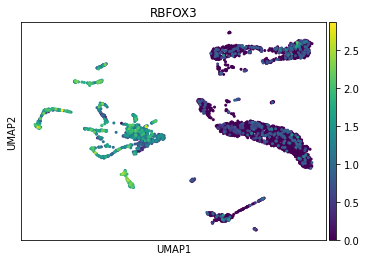

In [26]:
sc.pl.umap(P0_ann,color="RBFOX3")

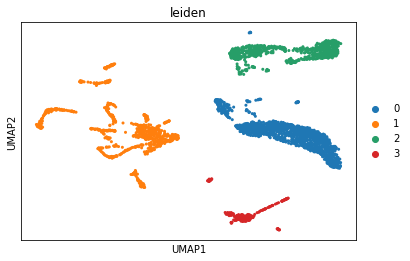

In [27]:
sc.tl.leiden(P0_ann,resolution=0.01)
sc.pl.umap(P0_ann,color="leiden")

In [60]:
P0_neuron_index = P0_ann.obs["leiden"].values == '1'

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
         Falling back to preprocessing with `sc.pp.pca` and default params.
... storing 'Sample' as categorical
... storing 'sample_short' as categorical
... storing 'precluster_sample' as categorical


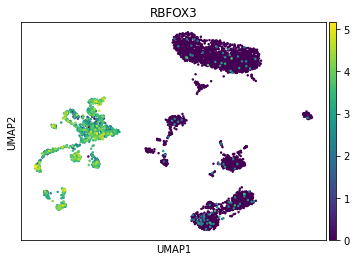

In [29]:
P2_ann = AnnData(P2_mat,obs=P2_annot)
P2_ann.var_names = gene_names_vec
sc.pp.neighbors(P2_ann)
sc.tl.umap(P2_ann)
sc.pl.umap(P2_ann,color="RBFOX3")

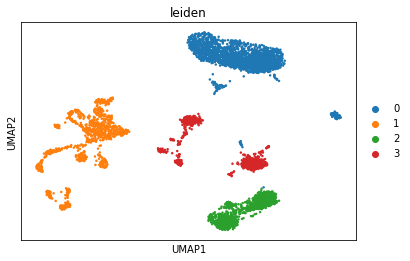

In [30]:
sc.tl.leiden(P2_ann,resolution=0.01)
sc.pl.umap(P2_ann,color="leiden")

In [63]:
P2_neuron_index = P2_ann.obs["leiden"].values == '1'

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
         Falling back to preprocessing with `sc.pp.pca` and default params.
... storing 'Sample' as categorical
... storing 'sample_short' as categorical
... storing 'precluster_sample' as categorical


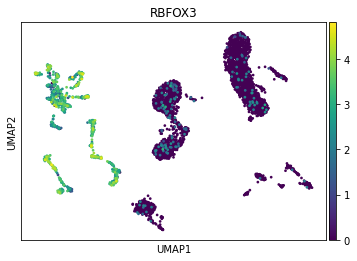

In [32]:
P3_ann = AnnData(P3_mat,obs=P3_annot)
P3_ann.var_names = gene_names_vec
sc.pp.neighbors(P3_ann)
sc.tl.umap(P3_ann)
sc.pl.umap(P3_ann,color="RBFOX3")

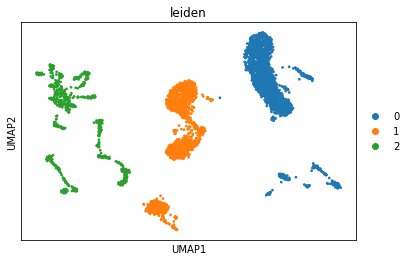

In [33]:
sc.tl.leiden(P3_ann,resolution=0.01)
sc.pl.umap(P3_ann,color="leiden")

In [62]:
P3_neuron_index = P3_ann.obs["leiden"].values == '2'

In [45]:
P0_ann.var_names_make_unique()
P2_ann.var_names_make_unique()

P3_ann.var_names_make_unique()

In [64]:
P0_neuron_mat = P0_mat[P0_neuron_index,:]
P2_neuron_mat = P2_mat[P2_neuron_index,:]
P3_neuron_mat = P3_mat[P3_neuron_index,:]

In [81]:
P0_neuron_annot = P0_annot.loc[P0_neuron_index,:]
P2_neuron_annot = P2_annot.loc[P2_neuron_index,:]
P3_neuron_annot = P3_annot.loc[P3_neuron_index,:]

In [55]:
P0_neuron_ann = AnnData(P0_neuron_mat,obs=P0_neuron_annot)
P0_neuron_ann.var_names = gene_names_vec
P0_neuron_ann.var_names_make_unique()

In [56]:
P2_neuron_ann = AnnData(P2_neuron_mat,obs=P2_neuron_annot)
P2_neuron_ann.var_names = gene_names_vec
P2_neuron_ann.var_names_make_unique()
P3_neuron_ann = AnnData(P3_neuron_mat,obs=P3_neuron_annot)
P3_neuron_ann.var_names = gene_names_vec
P3_neuron_ann.var_names_make_unique()

In [65]:
neuron_mat_list = [P0_neuron_mat,P2_neuron_mat,P3_neuron_mat]
gene_uniq = [P0_ann.var_names.values.tolist(),P2_ann.var_names.values.tolist(),P3_ann.var_names.values.tolist()]
#neuron_ann_list = [P0_neuron_ann,P2_neuron_ann,P3_neuron_ann]

In [66]:
integrated, corrected, genes = scanorama.correct(neuron_mat_list,gene_uniq, return_dimred=True)



Found 54894 genes among all datasets
[[0.         0.73424971 0.28865979]
 [0.         0.         0.98324742]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 1)
Processing datasets (0, 2)


In [97]:
integrated_round_2, _ = scanorama.integrate(corrected, gene_uniq)


Found 54894 genes among all datasets
[[0.         0.58648339 0.89175258]
 [0.         0.         0.63402062]
 [0.         0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (1, 2)
Processing datasets (0, 1)


In [69]:
integrated[0].shape

(873, 100)

In [105]:
integrated_concat = np.concatenate([integrated[0],integrated[1],integrated[2]],axis=0)
#integrated_concat = np.concatenate([integrated_round_2[0],integrated_round_2[1],integrated_round_2[2]],axis=0)

In [107]:
from scipy.sparse import vstack
neuron_exp_concat = vstack([P0_neuron_mat,P2_neuron_mat,P3_neuron_mat])

In [108]:
neuron_annot_concat = pd.concat([P0_neuron_annot,P2_neuron_annot,P3_neuron_annot],axis=0)

In [109]:
neuron_ann = AnnData(neuron_exp_concat,obs=neuron_annot_concat)

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [111]:
neuron_ann.var_names = gene_names_vec
neuron_ann.obsm["scanorama"] = integrated_concat

In [112]:
sc.pp.neighbors(neuron_ann,use_rep="scanorama")

In [113]:
sc.tl.umap(neuron_ann)

In [88]:

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

... storing 'Barcode' as categorical
... storing 'Sample' as categorical
... storing 'sample_short' as categorical
... storing 'precluster_sample' as categorical


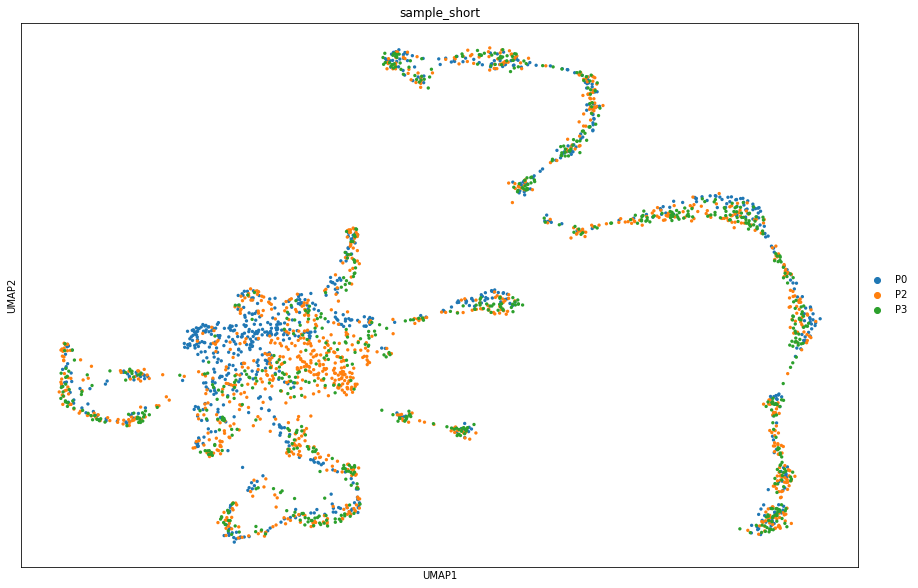

In [114]:
sc.pl.umap(neuron_ann,color="sample_short")

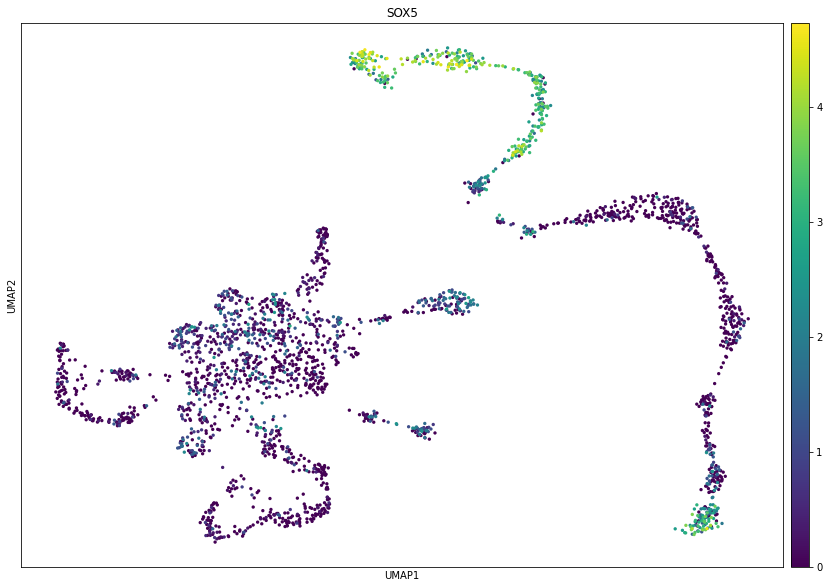

In [115]:
sc.pl.umap(neuron_ann,color="SOX5")

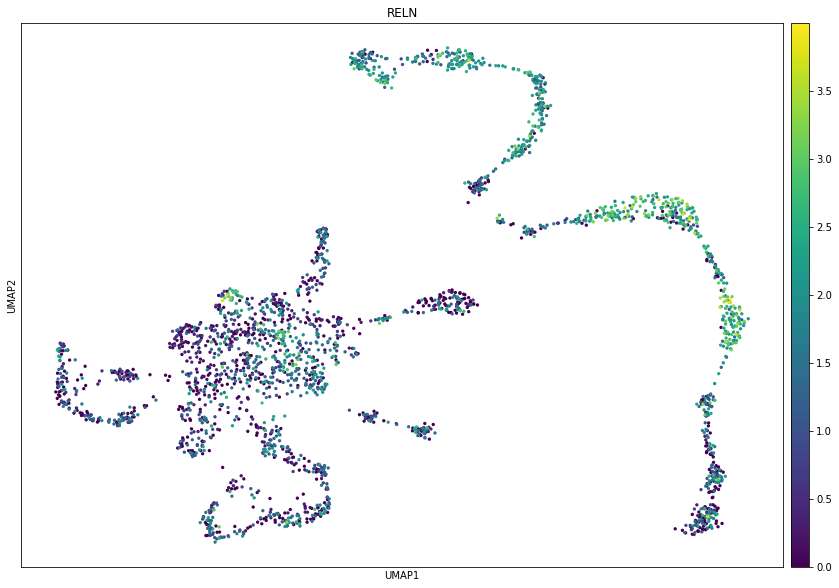

In [116]:
sc.pl.umap(neuron_ann,color="RELN")

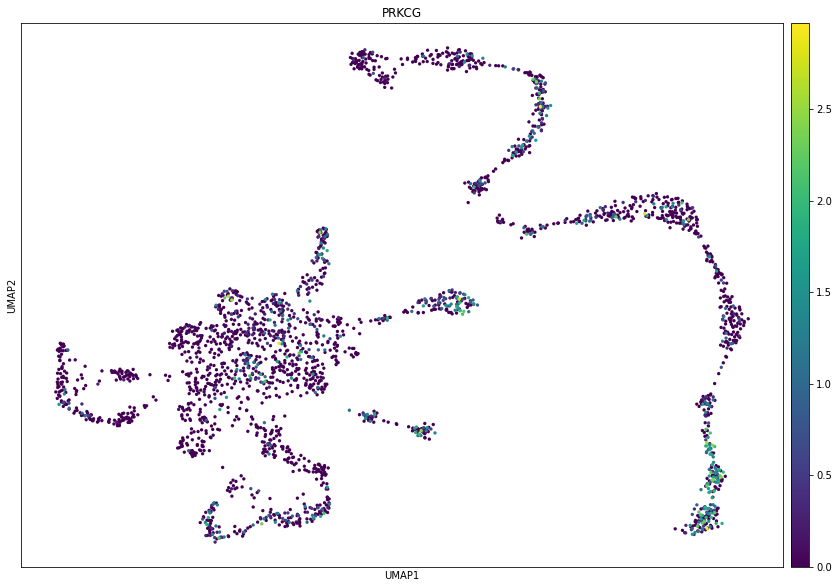

In [117]:
sc.pl.umap(neuron_ann,color="PRKCG")

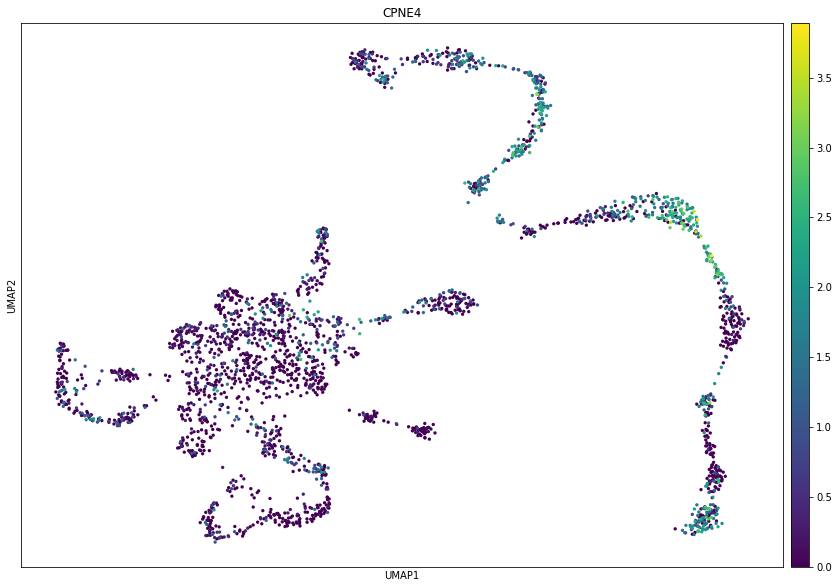

In [119]:
sc.pl.umap(neuron_ann,color="CPNE4")

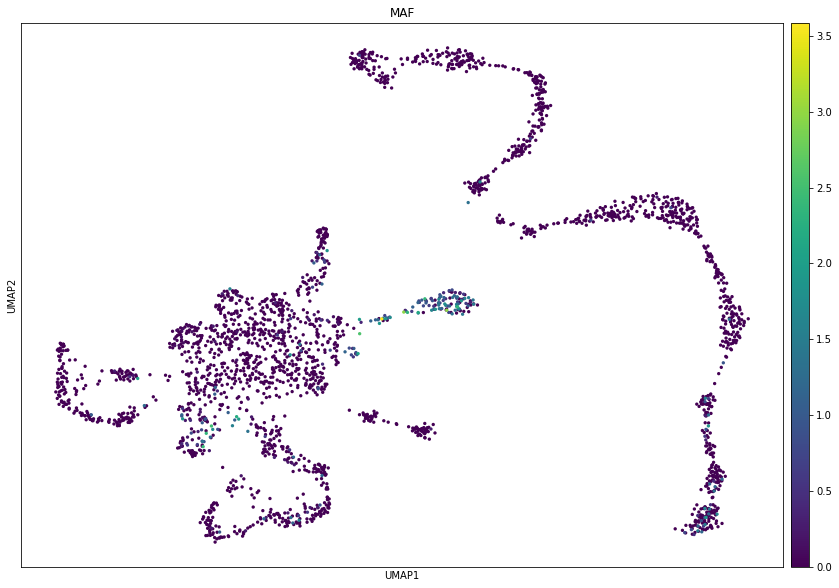

In [120]:
sc.pl.umap(neuron_ann,color="MAF")

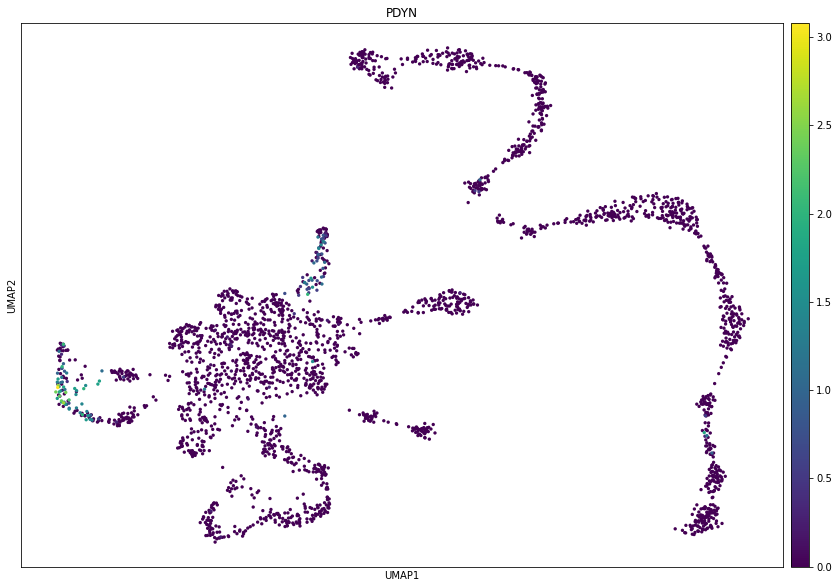

In [121]:
sc.pl.umap(neuron_ann,color="PDYN")

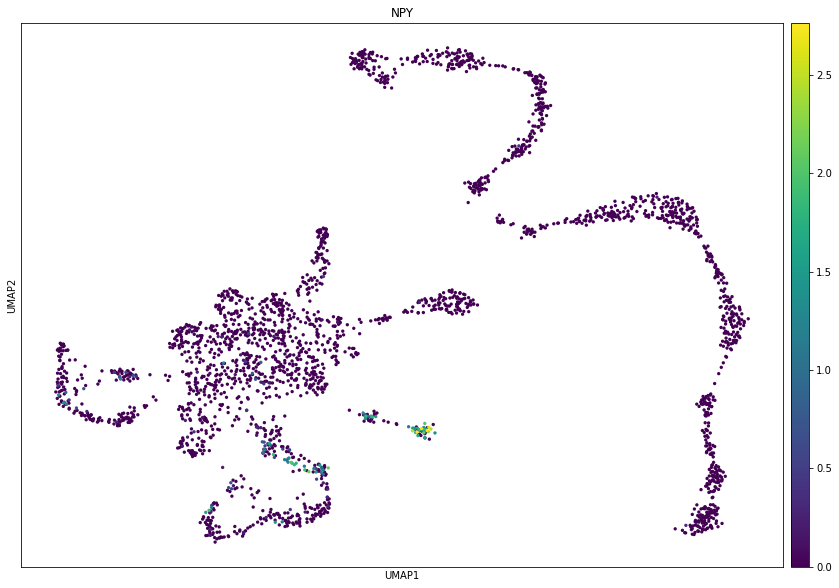

In [122]:
sc.pl.umap(neuron_ann,color="NPY")

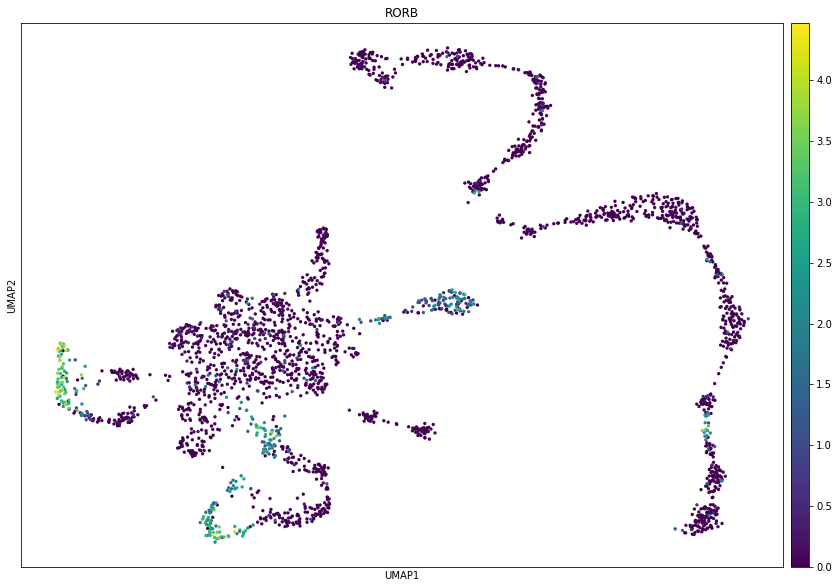

In [123]:
sc.pl.umap(neuron_ann,color="RORB")

In [143]:
sc.tl.leiden(neuron_ann,resolution=0.5)

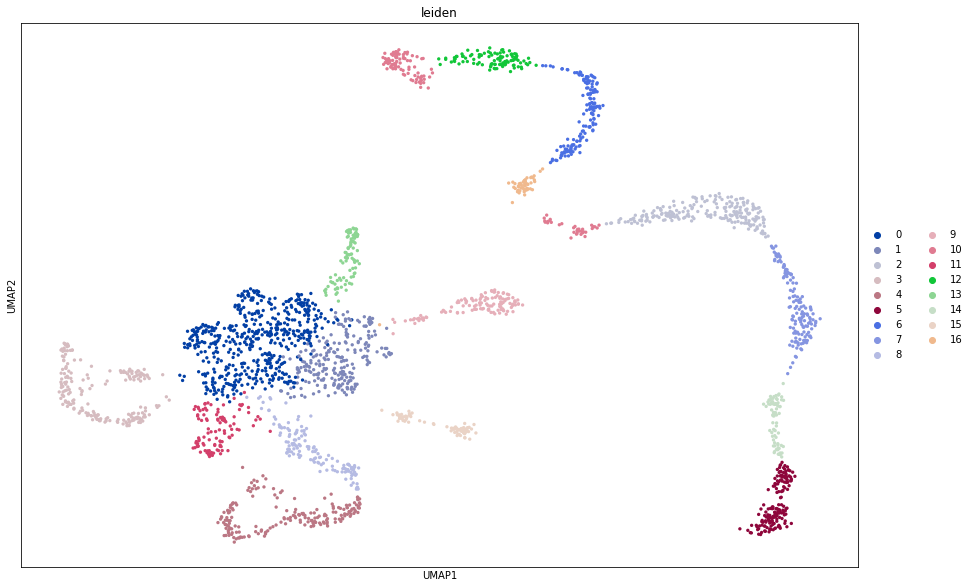

In [130]:
sc.pl.umap(neuron_ann,color="leiden")

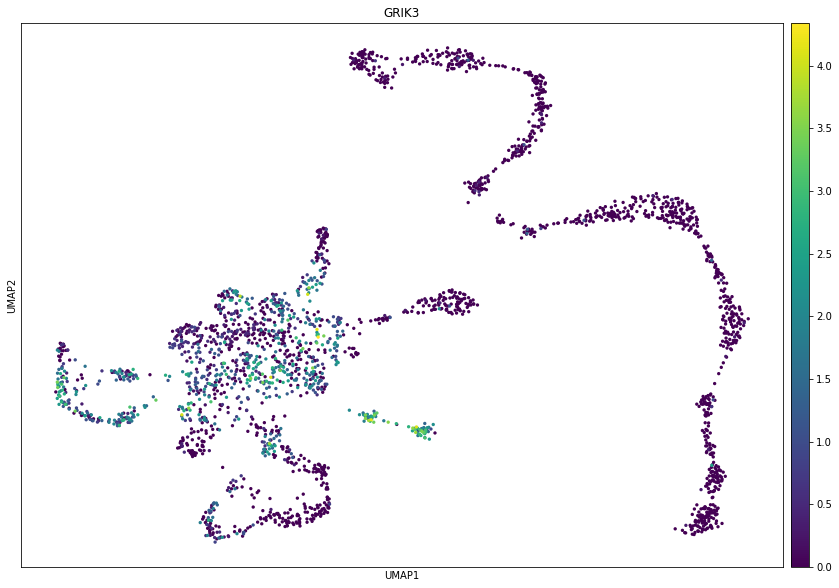

In [131]:
sc.pl.umap(neuron_ann,color="GRIK3")

In [135]:
marker_gene_list=["SLC17A6","GFRA1","CRHR2","COL13A1","NMUR2","TAC3","NMU","COL5A2","GHR","COL24A1","NMBR","TAC1","ANOS1","FSTL4","ADARB2","COL21A1","MAF","ST8SIA6","MAFA","NTNG1","ADAMTS16","TLL2","OTOGL","PDYN","SLC32A1","RGS6","MASP1","GDNF-AS1","RREB1","NPY","CPNE2","MET","PTN"]

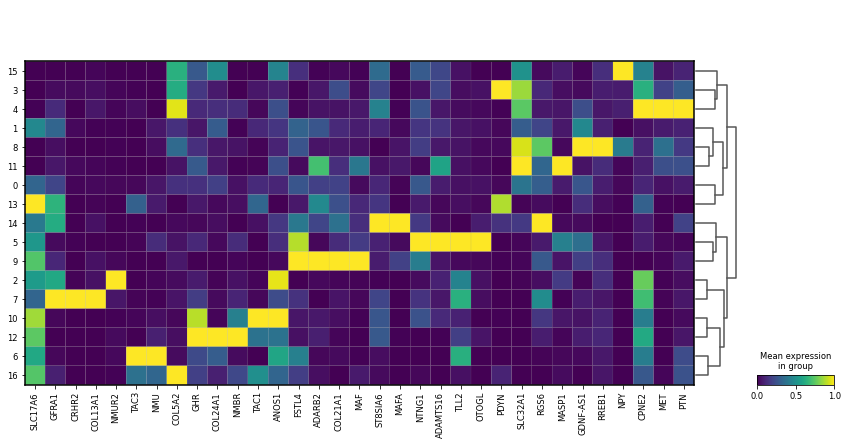

In [147]:
sc.tl.dendrogram(neuron_ann,groupby="leiden")
sc.pl.matrixplot(neuron_ann,var_names=marker_gene_list,groupby="leiden",standard_scale="var",dendrogram=True)

In [172]:
clust_name_dict = {
    "7" : "GLUT1",
    "2" : "GLUT2",
    "6" : "GLUT3",
    "16" : "GLUT4",
    "12" : "GLUT5",
    "10" : "GLUT6",
    "9" : "GLUT7",
    "14": "GLUT8",
    "5" : "GLUT9",
    "13" : "GLUT11",
    "11" : "GABA1",
    "8" : "GABA2",
    "15": "GABA3",
    "4" : "GABA4",
    "3" : "GABA5",
    "0" : "midVen",
    "1" : "midVen"
}

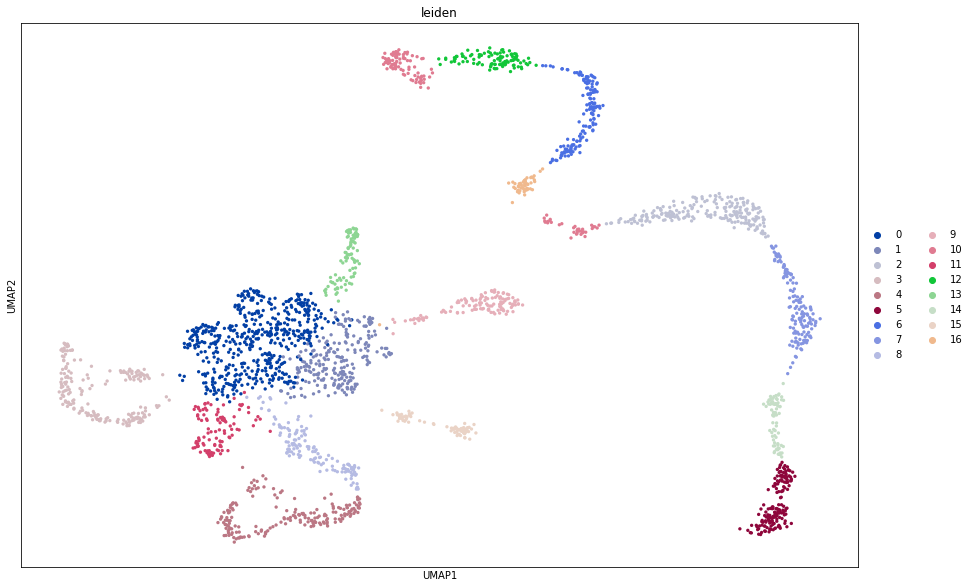

In [148]:
sc.pl.umap(neuron_ann,color="leiden")

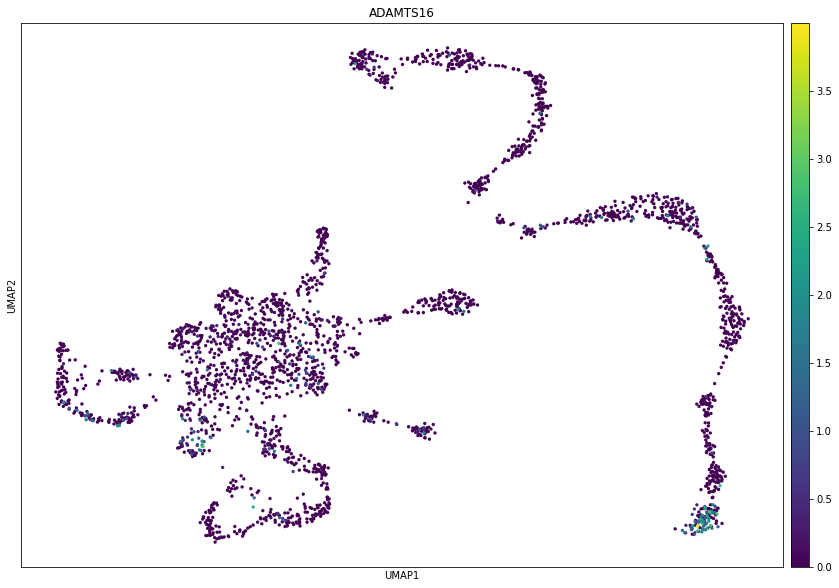

In [149]:
sc.pl.umap(neuron_ann,color="ADAMTS16")

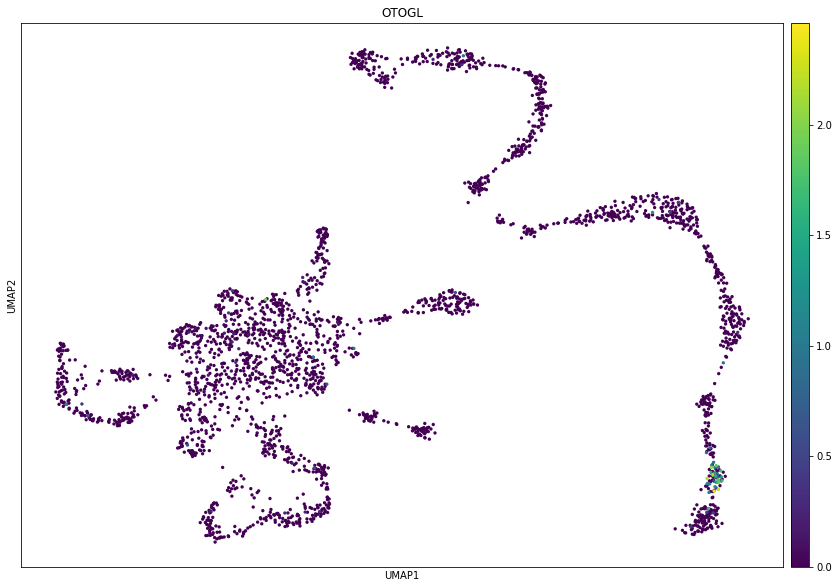

In [150]:
sc.pl.umap(neuron_ann,color="OTOGL")

In [162]:
sc.tl.leiden(neuron_ann,key_added="clust_2")

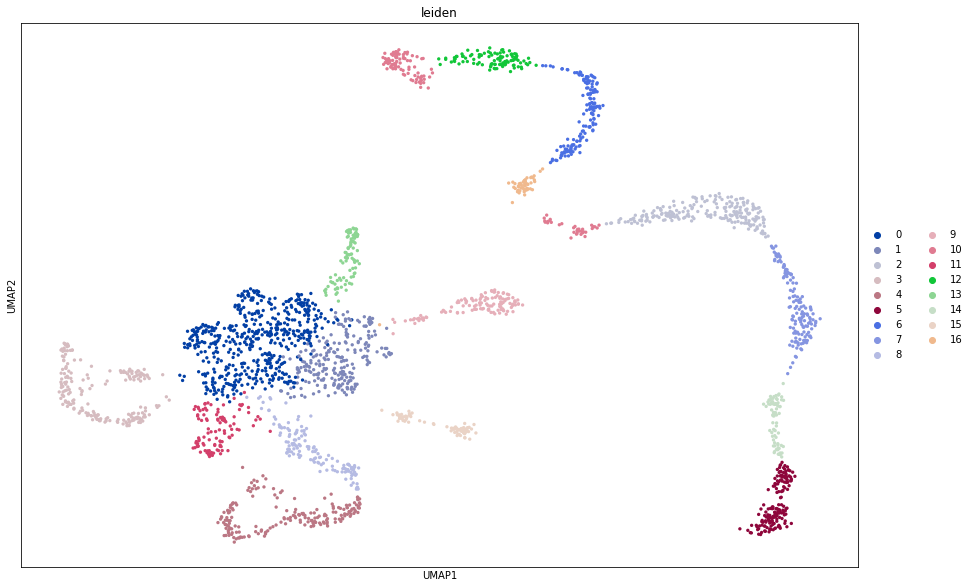

In [163]:
sc.pl.umap(neuron_ann,color="leiden")

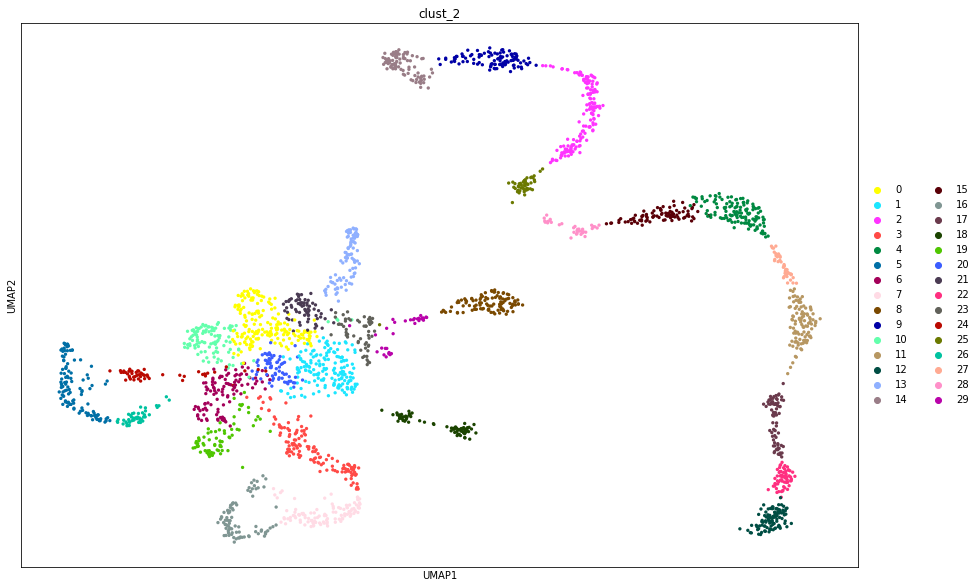

In [169]:
sc.tl.leiden(neuron_ann,resolution = 1.4,key_added="clust_2")
sc.pl.umap(neuron_ann,color="clust_2")

In [174]:
neuron_label = np.asarray([clust_name_dict[clust] for clust in neuron_ann.obs["leiden"].values])

In [175]:
glut10_index = neuron_ann.obs["clust_2"] == "22"
neuron_label[glut10_index] = "GLUT10"

In [186]:
neuron_label_order = ["GLUT1","GLUT2","GLUT3","GLUT4","GLUT5","GLUT6","GLUT7","GLUT8","GLUT9","GLUT10","GLUT11","GABA1","GABA2","GABA3","GABA4","GABA5","midVen"]

In [187]:
neuron_ann.obs["cell_type"] = pd.Categorical(neuron_label,categories=neuron_label_order)

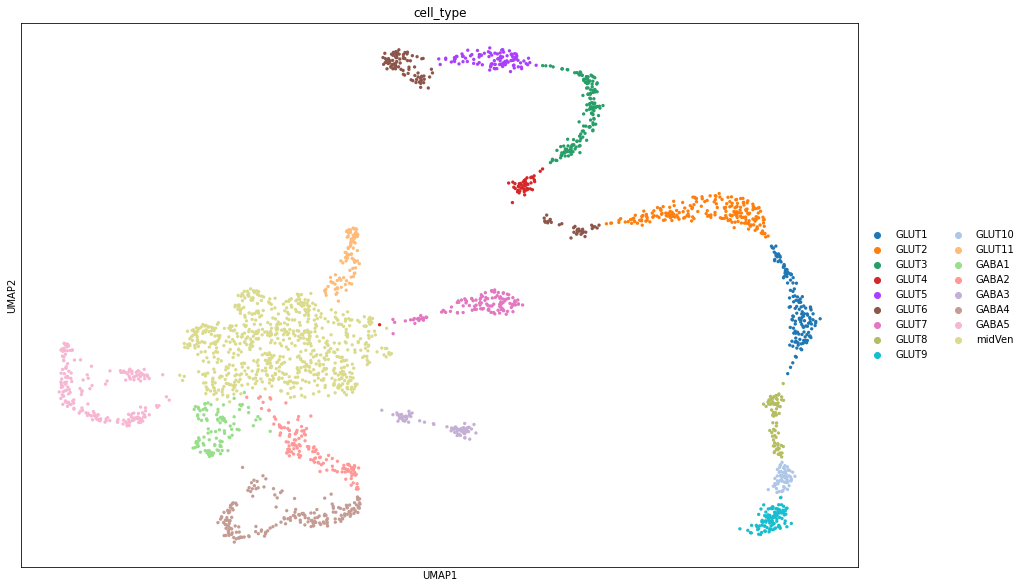

In [188]:
sc.pl.umap(neuron_ann,color="cell_type")

In [189]:
neuron_ann.write("../paper_inter_data/integrated_clustered_ann.h5ad")

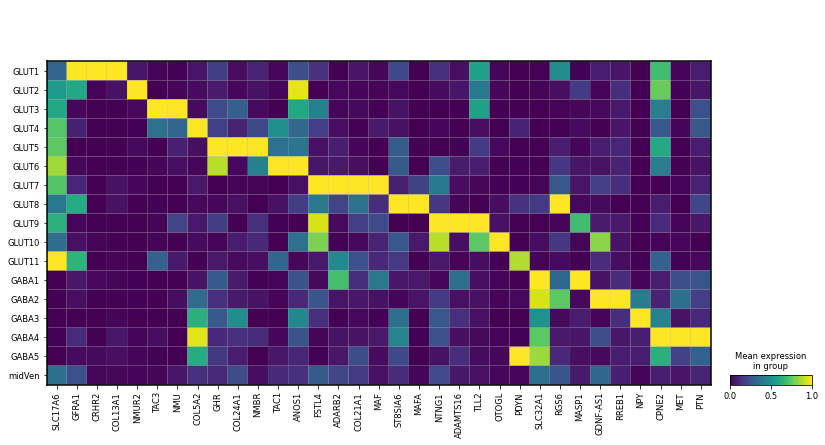

In [190]:
sc.pl.matrixplot(neuron_ann,var_names=marker_gene_list,groupby="cell_type",standard_scale="var")

In [199]:
dorsal_index = neuron_ann.obs["cell_type"].values != "midVen"
neuron_annot_concat["cell_type"] = neuron_ann.obs["cell_type"].values

In [200]:
dorsal_neuron_ann = AnnData(neuron_exp_concat[dorsal_index,:],obs=neuron_annot_concat.loc[dorsal_index,:])
dorsal_neuron_ann.var_names = gene_names_vec
dorsal_neuron_ann.var_names_make_unique()

dorsal_neuron_ann.obsm["scanorama"] = integrated_concat[dorsal_index,:]
sc.pp.neighbors(dorsal_neuron_ann,use_rep="scanorama")

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [206]:
dorsal_neuron_label_order = ["GLUT1","GLUT2","GLUT3","GLUT4","GLUT5","GLUT6","GLUT7","GLUT8","GLUT9","GLUT10","GLUT11","GABA1","GABA2","GABA3","GABA4","GABA5"]

In [204]:
dorsal_neuron_ann.obsm["X_umap"] = neuron_ann.obsm["X_umap"][dorsal_index,:]

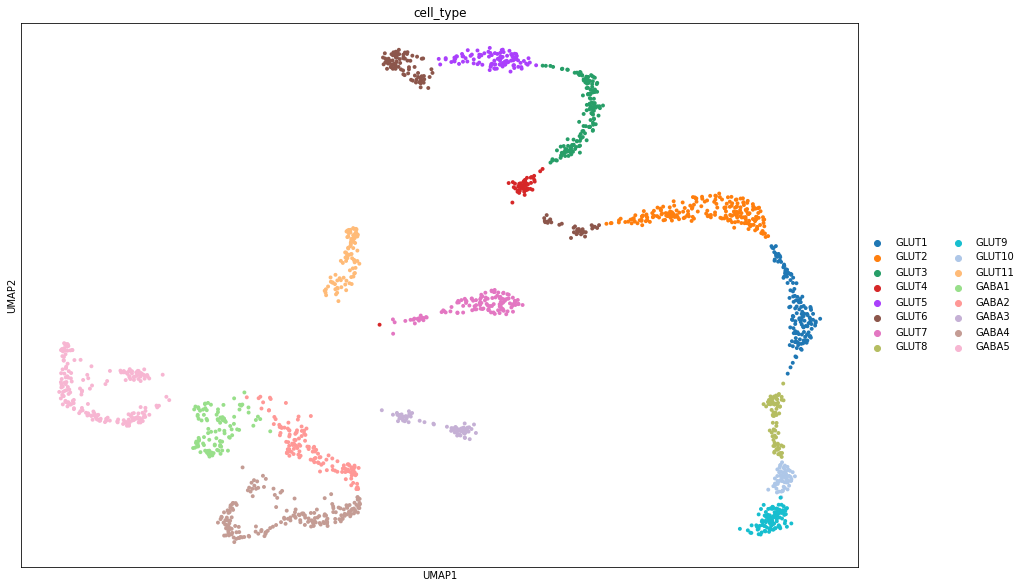

In [208]:
dorsal_neuron_ann.obs["cell_type"] = pd.Categorical(dorsal_neuron_ann.obs["cell_type"].values,dorsal_neuron_label_order)
sc.pl.umap(dorsal_neuron_ann,color="cell_type",save="_dorsal_neuron_cell_types.pdf")

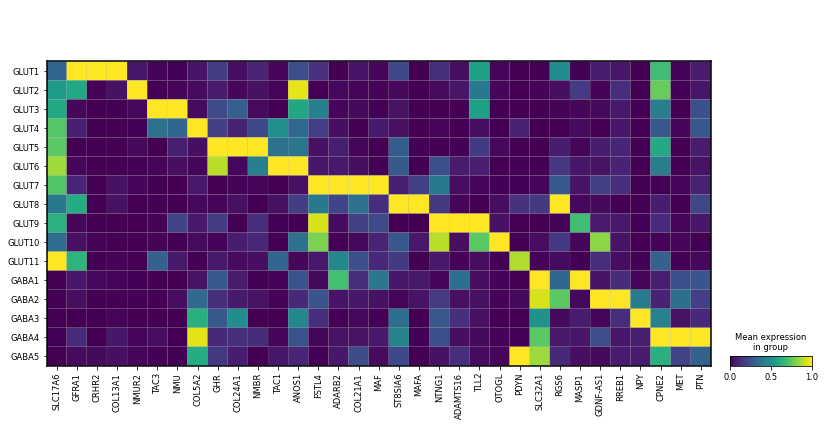

In [210]:
sc.pl.matrixplot(dorsal_neuron_ann,var_names=marker_gene_list,groupby="cell_type",standard_scale="var",save="_dorsal_neuron_cell_types_markers.pdf")

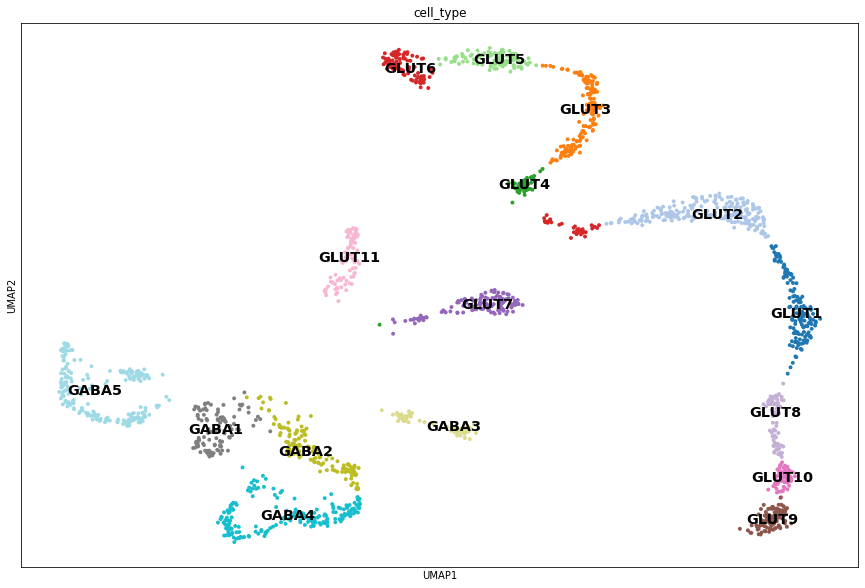

In [263]:
sc.pl.umap(dorsal_neuron_ann,color="cell_type",save="_dorsal_neuron_cell_types.pdf",legend_loc="on data",legend_fontsize ="x-large",palette="tab20")

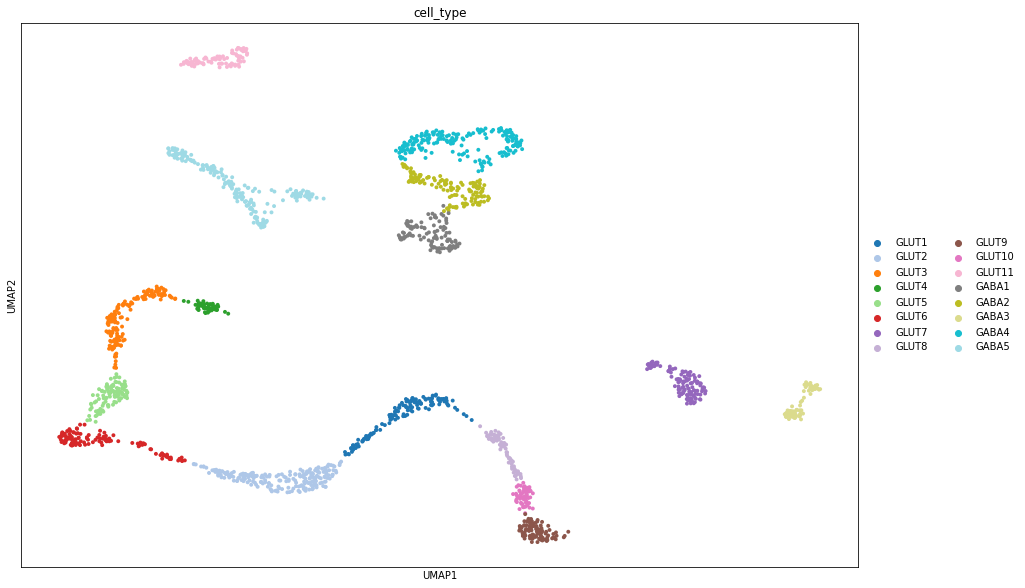

In [329]:
#sc.tl.umap(dorsal_neuron_ann)
sc.pl.umap(dorsal_neuron_ann,color="cell_type")

In [331]:
from plotnine import ggplot,aes,geom_point

In [332]:
dorsal_neuron_annot_df = dorsal_neuron_ann.obs
dorsal_neuron_annot_df["umap_1"] = dorsal_neuron_ann.obsm["X_umap"][:,0]
dorsal_neuron_annot_df["umap_2"] = dorsal_neuron_ann.obsm["X_umap"][:,1]

In [336]:
gplot=ggplot(dorsal_neuron_annot_df,aes(x="umap_1",y="umap_2",color="cell_type"))+geom_point(size=.7)
gplot.save("figures/plotnine_dorsal_neurons_umap.pdf")

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figures/plotnine_dorsal_neurons_umap.pdf


In [211]:
neuron_class = ["Excitatory" if "GLUT" in cell_type else "Inhibitory "for cell_type in dorsal_neuron_ann.obs["cell_type"].values]

In [213]:
dorsal_neuron_ann.obs["neuron_class"] = pd.Categorical(neuron_class)

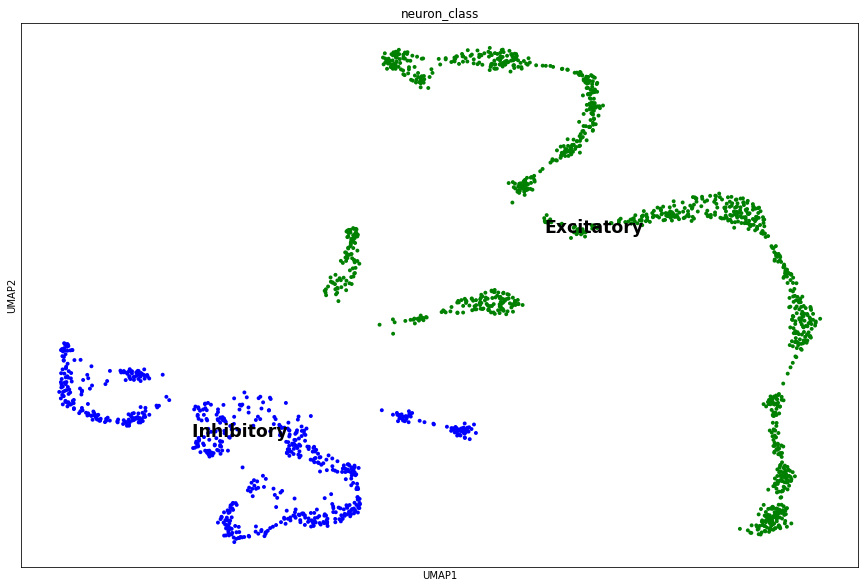

In [262]:
sc.pl.umap(dorsal_neuron_ann,color="neuron_class",save="_dorsal_neuron_cell_class.pdf",legend_loc="on data",legend_fontsize ="xx-large",palette=["Green","Blue"])

In [243]:
import seaborn as sns
from collections import Counter

In [244]:
cell_type_number = Counter(dorsal_neuron_ann.obs["cell_type"].values)

In [247]:
list(cell_type_number.keys())

['GLUT6',
 'GABA1',
 'GABA5',
 'GLUT1',
 'GABA4',
 'GLUT5',
 'GLUT9',
 'GABA2',
 'GLUT4',
 'GLUT2',
 'GABA3',
 'GLUT3',
 'GLUT10',
 'GLUT11',
 'GLUT7',
 'GLUT8']

In [250]:
graph_class = ["Excitatory" if "GLUT" in cell_type else "Inhibitory "for cell_type in list(cell_type_number.keys())]

In [253]:
barplot_b2_dict = {"cell_type" : pd.Categorical(list(cell_type_number.keys()),dorsal_neuron_label_order), "count": list(cell_type_number.values()),"neuron_class":graph_class }
barplot_b2_df = pd.DataFrame(barplot_b2_dict)

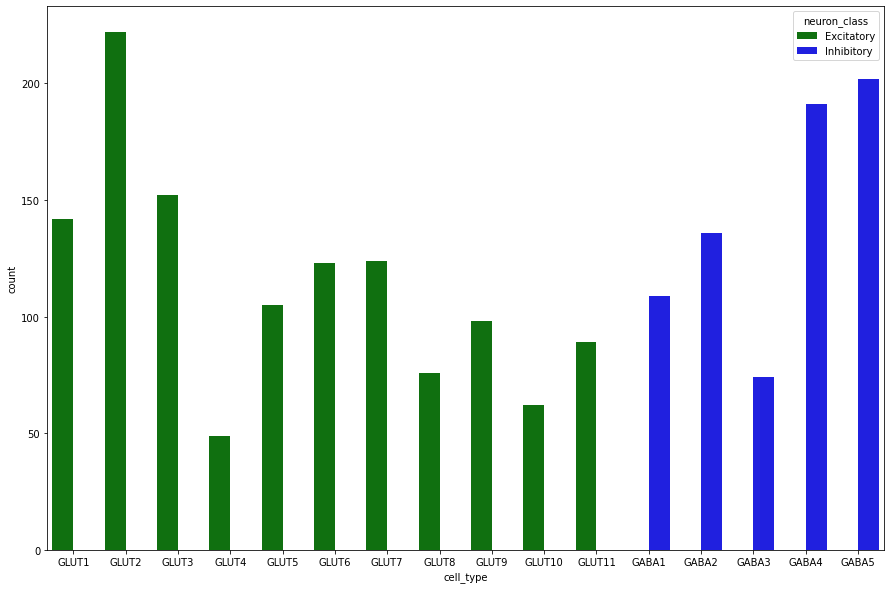

In [257]:
sns.barplot(data=barplot_b2_df, x="cell_type",y="count",hue="neuron_class",palette=["Green","Blue"])
plt.savefig("figures/neuron_type_count_barplot")

In [258]:
cell_class_number = Counter(dorsal_neuron_ann.obs["neuron_class"].values)

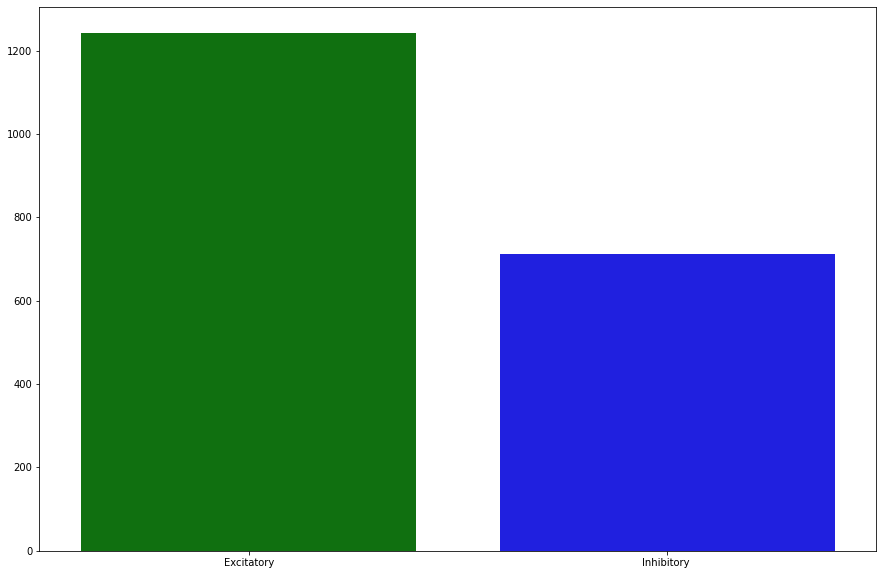

In [261]:
sns.barplot( x=list(cell_class_number.keys()),y=list(cell_class_number.values()),palette=["Green","Blue"])
plt.savefig("figures/neuron_class_count_barplot")

In [275]:
dorsal_neuron_ann.write("../paper_inter_data/dorsal_neuron_integrated_clustered_ann.h5ad")

In [337]:
dorsal_neuron_ann.write("../paper_inter_data/dorsal_neuron_integrated_clustered__re_umap_ann.h5ad")

In [264]:
#doing the full
full_mat_list = [P0_mat,P2_mat,P3_mat]
integrated_full, corrected_full,_ = scanorama.correct(full_mat_list,gene_uniq, return_dimred=True)


Found 54894 genes among all datasets
[[0.         0.35130224 0.2895215 ]
 [0.         0.         0.84583435]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 1)
Processing datasets (0, 2)


In [265]:
integrated_full_concat = np.concatenate([integrated_full[0],integrated_full[1],integrated_full[2]],axis=0)
full_exp_concat = vstack([P0_mat,P2_mat,P3_mat])
full_annot_concat = pd.concat([P0_annot,P2_annot,P3_annot],axis=0)


In [266]:
full_ann = AnnData(full_exp_concat,obs=full_annot_concat)
full_ann.var_names = gene_names_vec
full_ann.obsm["scanorama"] = integrated_full_concat

/projects/pfenninggroup/machineLearningForComputationalBiology/SingleCell/lib/anaconda3/envs/neuron/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [267]:
sc.pp.neighbors(full_ann,use_rep="scanorama")

In [269]:
sc.tl.umap(full_ann)

... storing 'Barcode' as categorical
... storing 'Sample' as categorical
... storing 'sample_short' as categorical
... storing 'precluster_sample' as categorical


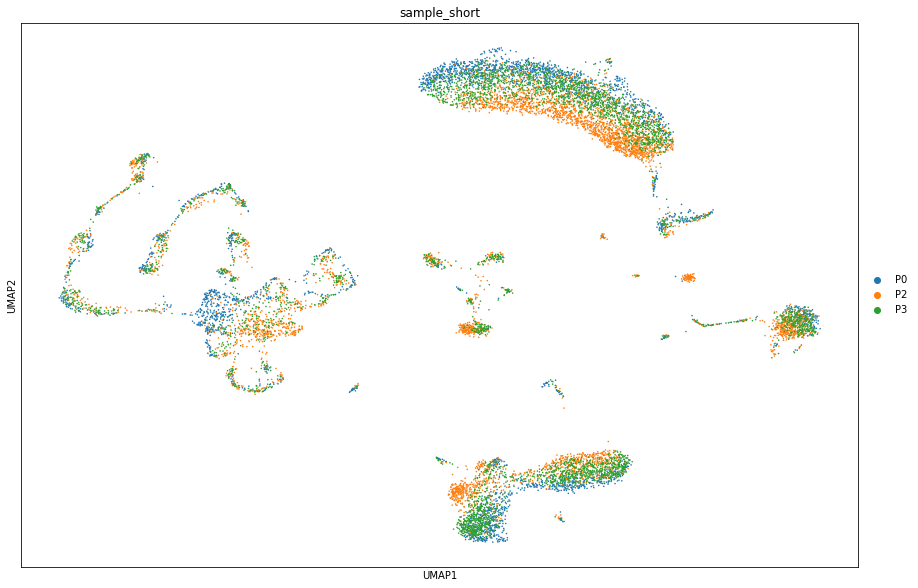

In [270]:
sc.pl.umap(full_ann,color="sample_short")

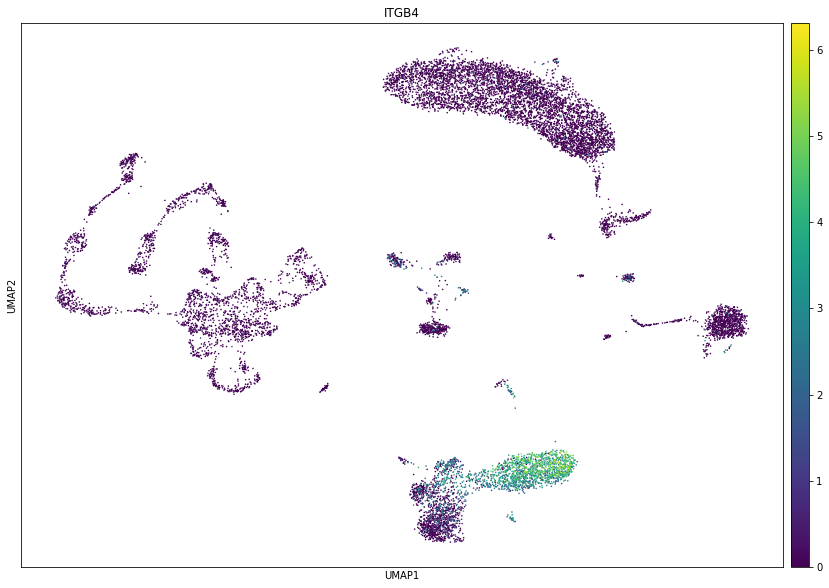

In [278]:
sc.pl.umap(full_ann,color="ITGB4")

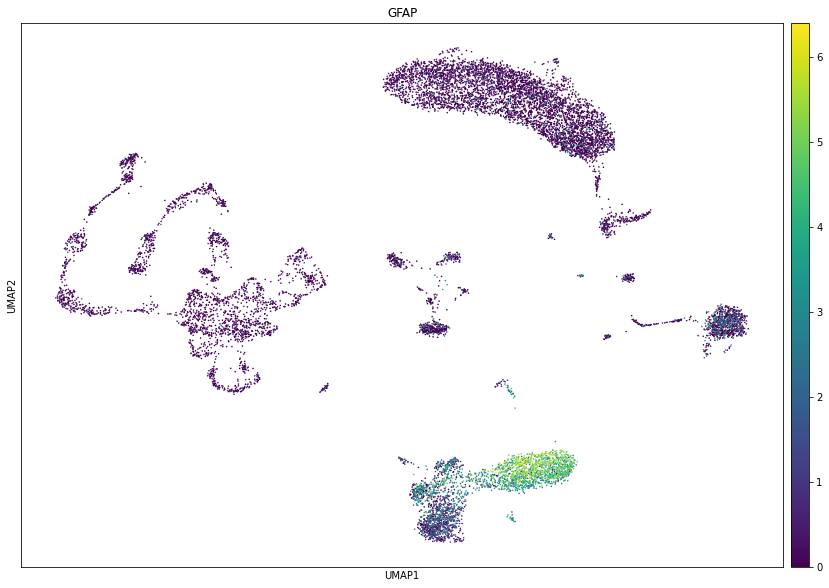

In [271]:
sc.pl.umap(full_ann,color="GFAP")

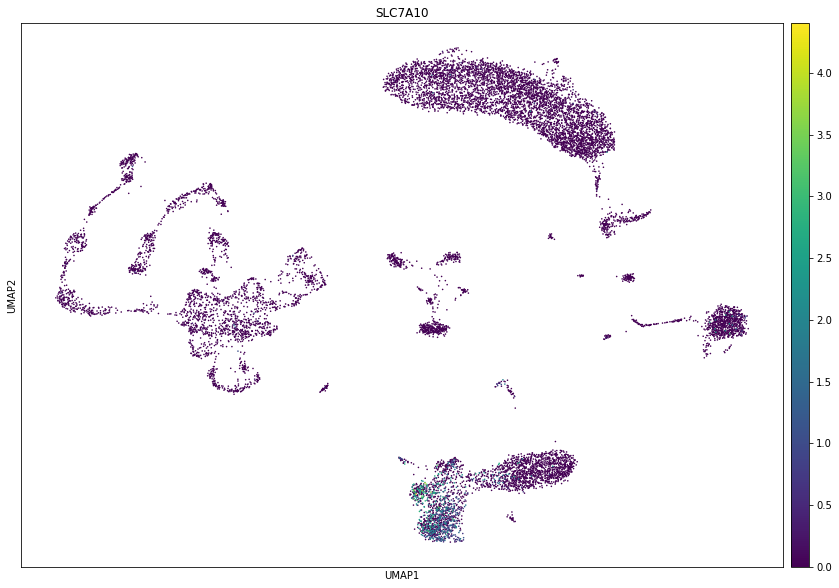

In [280]:
sc.pl.umap(full_ann,color="SLC7A10")

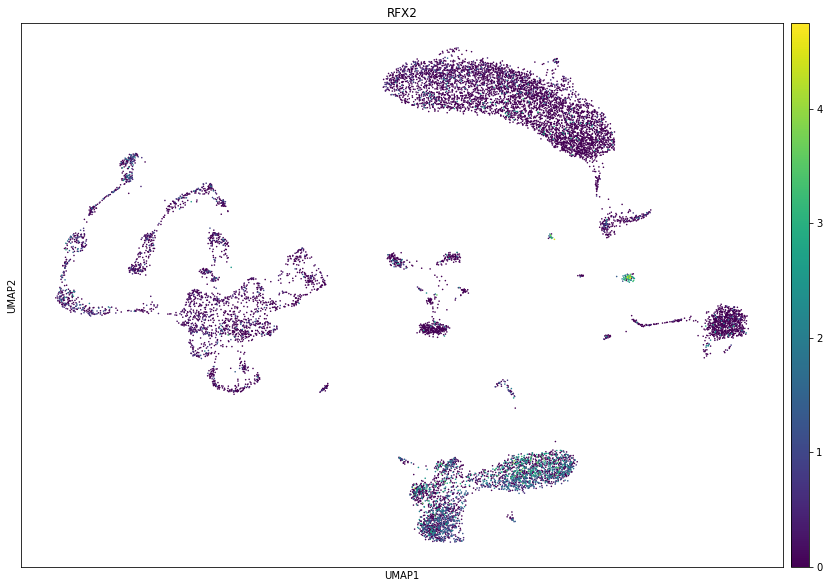

In [282]:
sc.pl.umap(full_ann,color="RFX2")

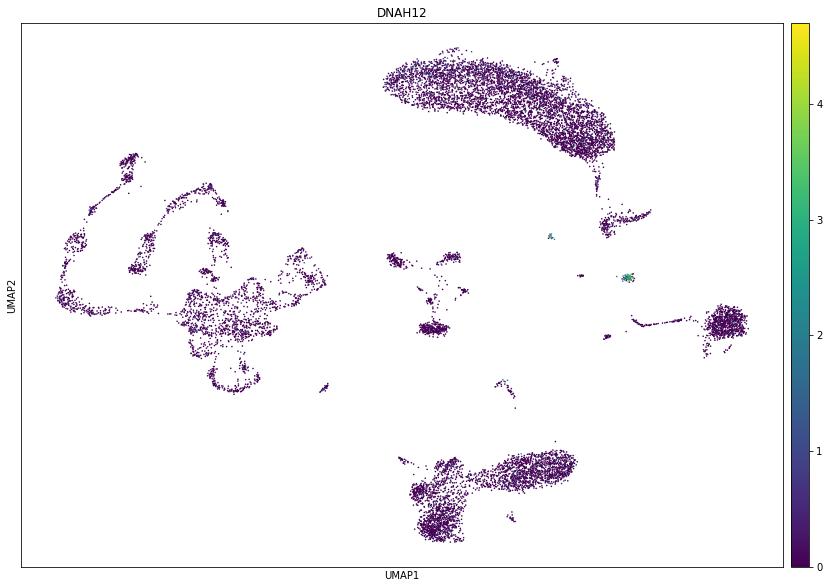

In [283]:
sc.pl.umap(full_ann,color="DNAH12")

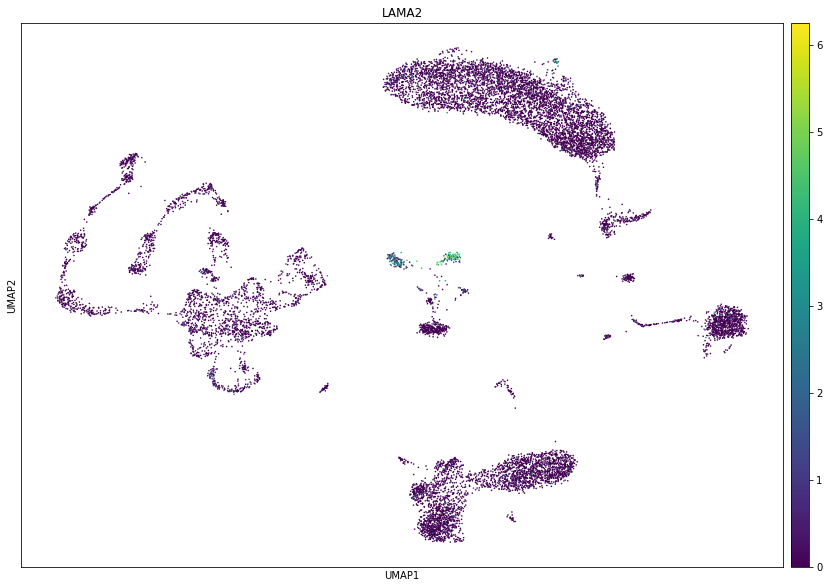

In [284]:
sc.pl.umap(full_ann,color="LAMA2")

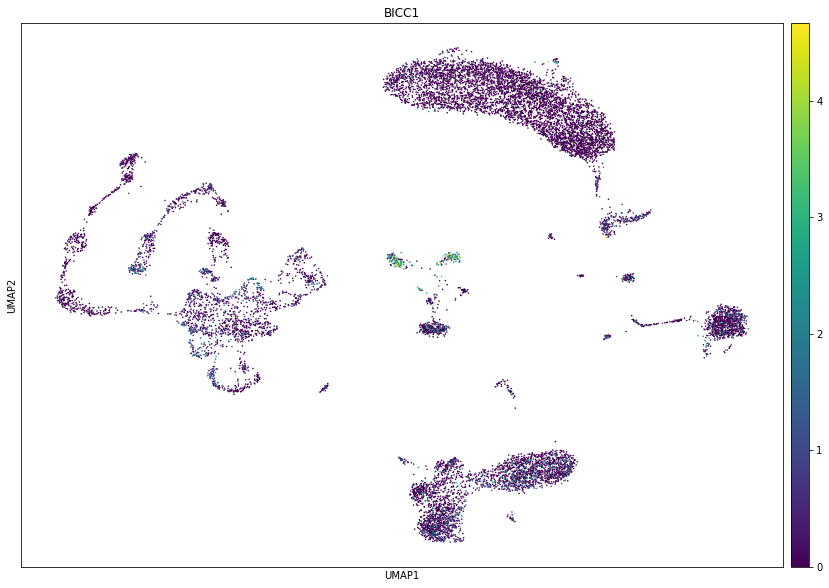

In [285]:
sc.pl.umap(full_ann,color="BICC1")

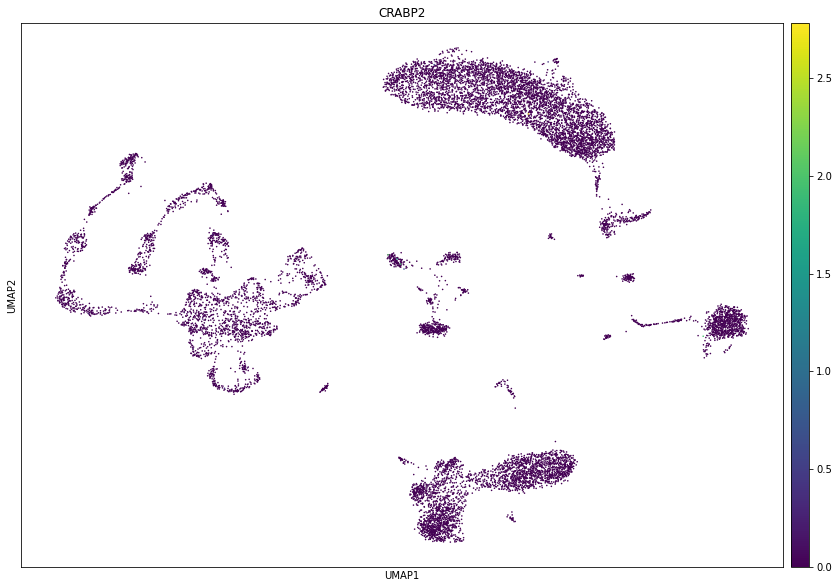

In [427]:
sc.pl.umap(full_ann,color="CRABP2")

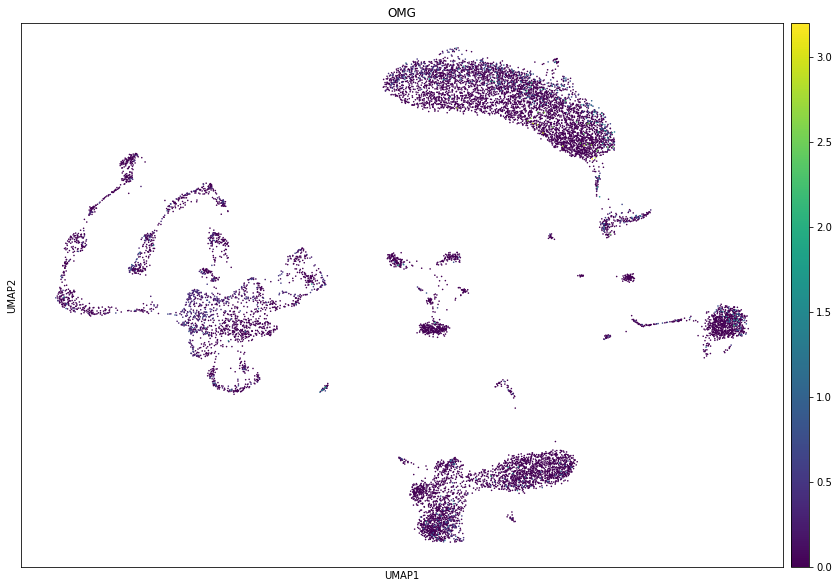

In [286]:
sc.pl.umap(full_ann,color="OMG")

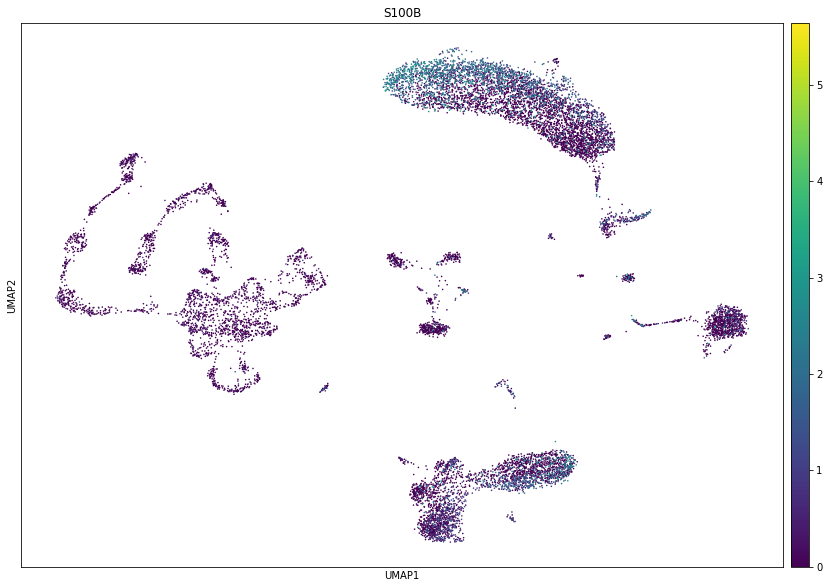

In [287]:
sc.pl.umap(full_ann,color="S100B")

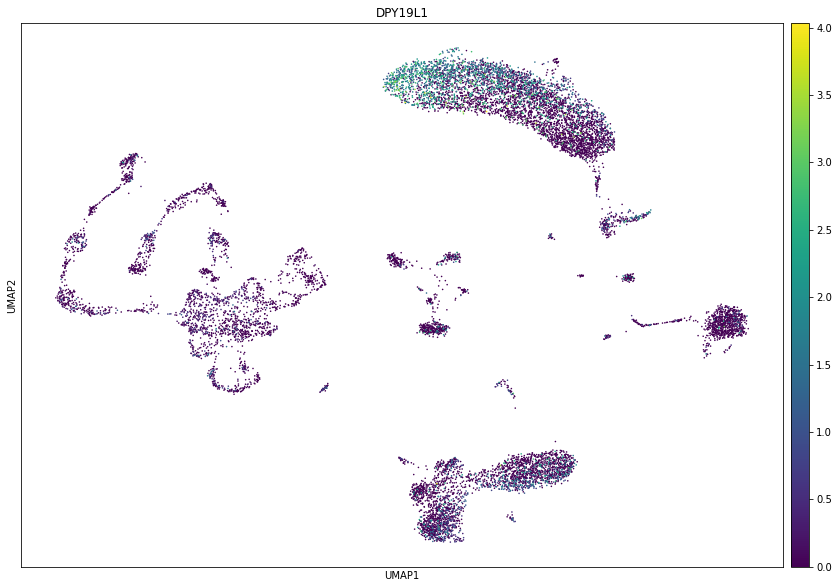

In [288]:
sc.pl.umap(full_ann,color="DPY19L1")

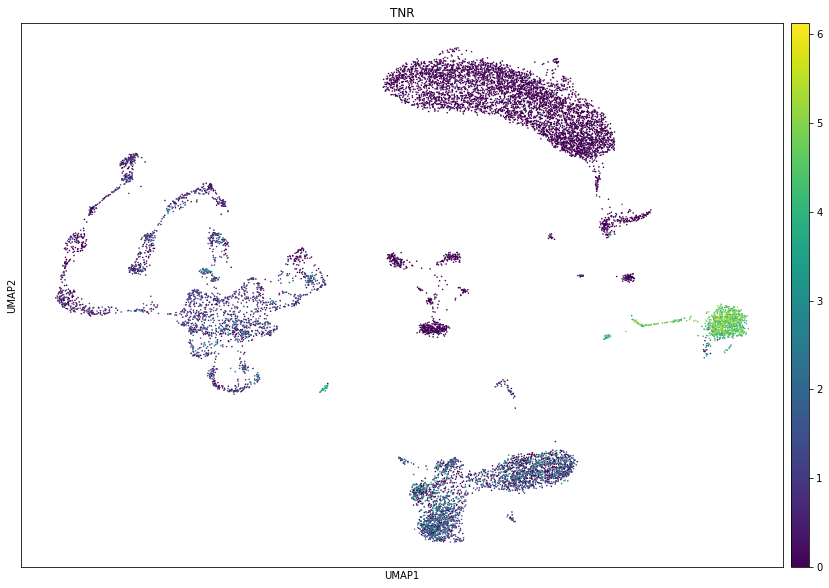

In [289]:
sc.pl.umap(full_ann,color="TNR")

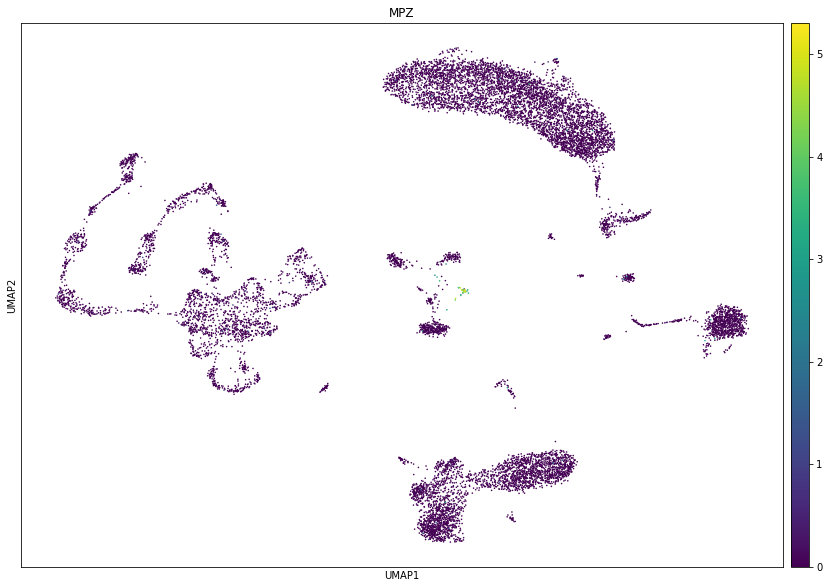

In [290]:
sc.pl.umap(full_ann,color="MPZ")

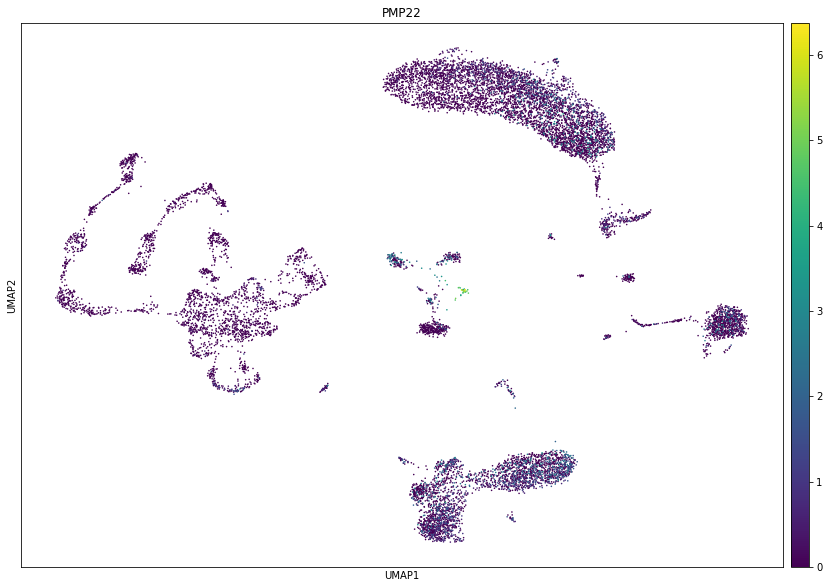

In [347]:
sc.pl.umap(full_ann,color="PMP22")

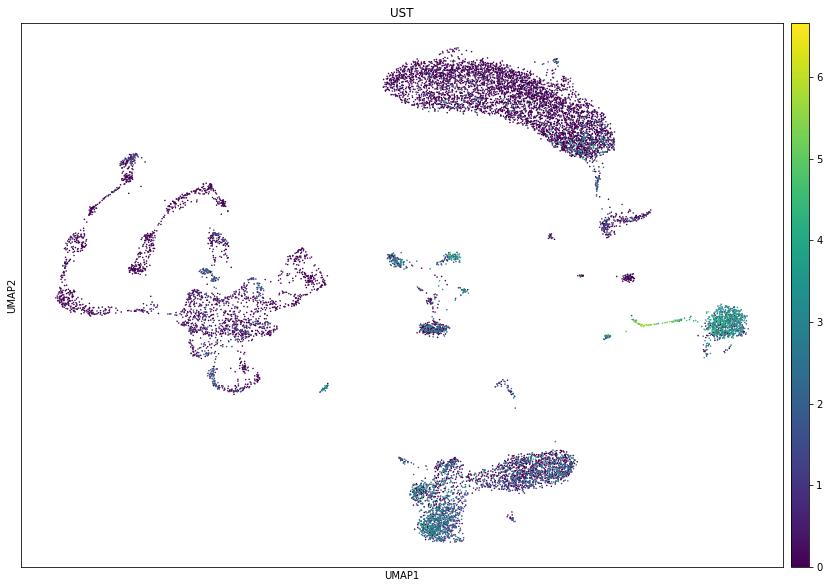

In [295]:
sc.pl.umap(full_ann,color="UST")

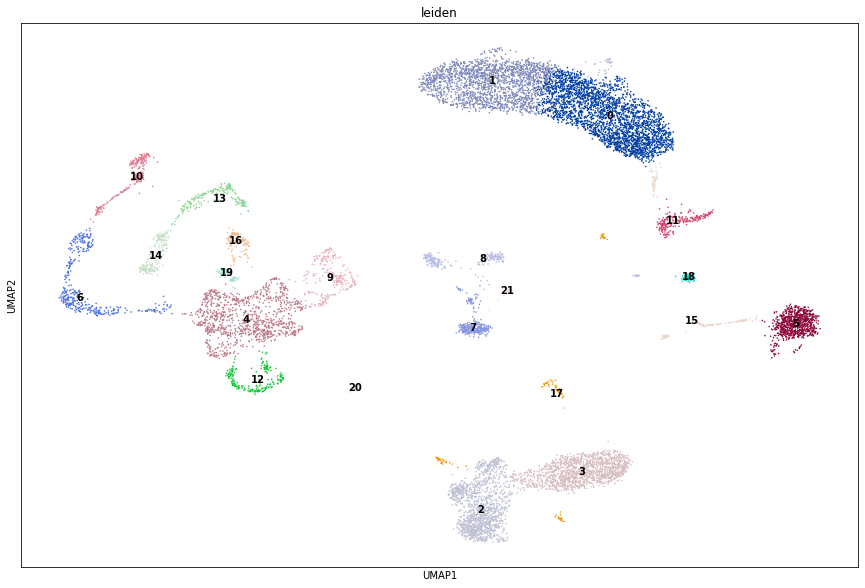

In [314]:
sc.tl.leiden(full_ann,resolution=.5)
sc.pl.umap(full_ann,color="leiden",legend_loc="on data")

In [324]:
full_ann.obs["mystery_7"] = pd.Categorical(full_ann.obs["leiden"].values=="7")

In [325]:
sc.tl.rank_genes_groups(full_ann,groupby="mystery_7")

In [326]:
full_ann.uns["rank_genes_groups"]['names'][:10]

rec.array([('ATP10B', 'ABR'), ('ATP2B2', 'PLXDC2'), ('NFASC', 'INPP5D'),
           ('NPAS3', 'PALD1'), ('NTM', 'APBB1IP'), ('MAGI2', 'ARHGAP15'),
           ('MAPT', 'SSH2'), ('SRCIN1', 'SNX29'), ('THSD7A', 'KCNQ3'),
           ('FAM222A', 'MEF2C')],
          dtype=[('False', 'O'), ('True', 'O')])

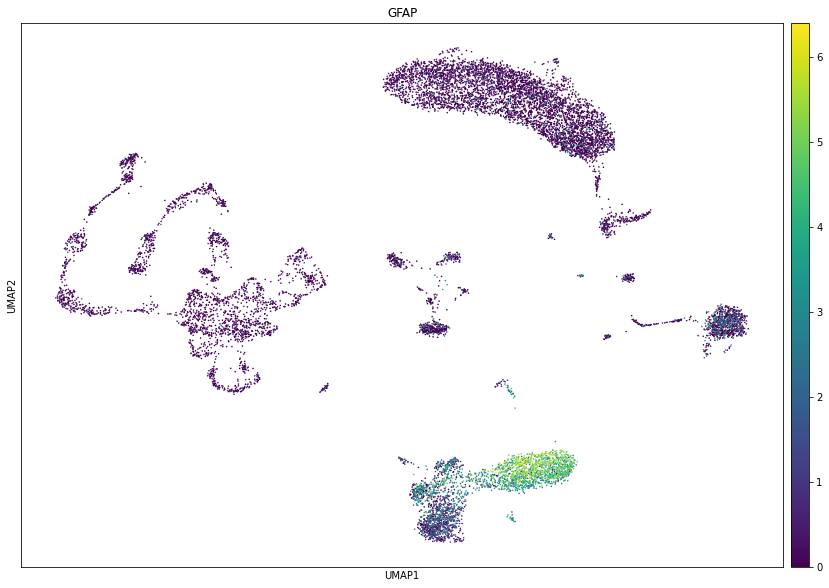

In [344]:
sc.pl.umap(full_ann,color="")

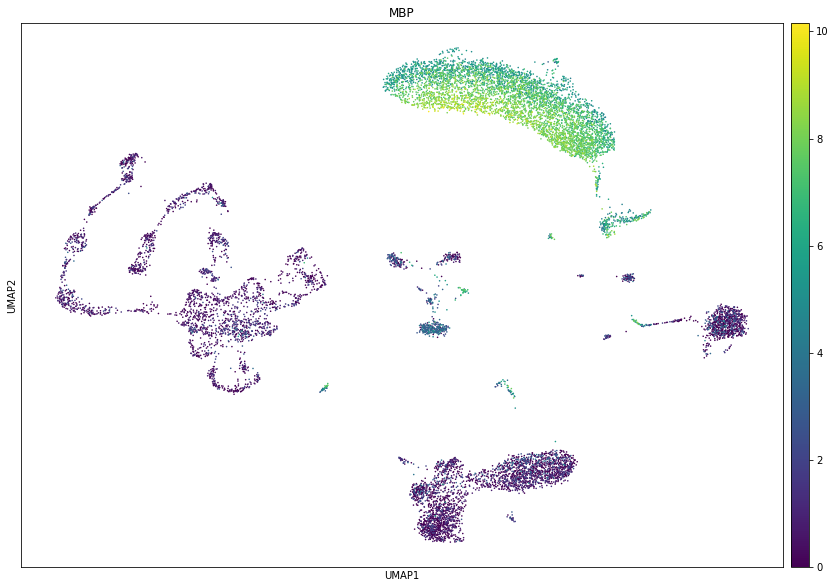

In [387]:
sc.pl.umap(full_ann,color="MBP")

In [514]:
full_ann.write("../paper_inter_data/full_integrated.h5ad")

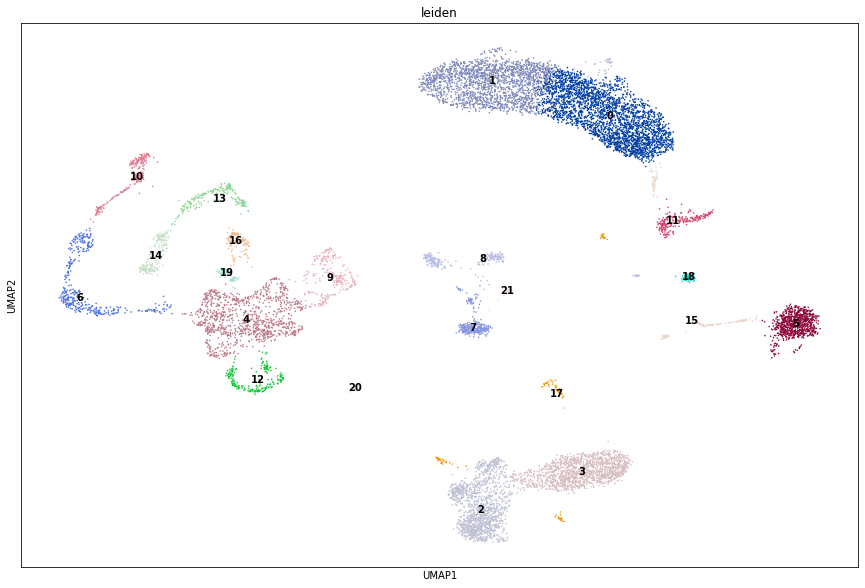

In [350]:
sc.pl.umap(full_ann,color="leiden",legend_loc="on data")

In [500]:
cell_label_dict = {'1': "Oligo 2",
                  "0":"Oligo 1",
                  "17":"Astrocyte 1",
                  "3":"Astrocyte 1",
                  "2": "Astrocyte 2",
                  "18": "Ependymal cells",
                  "8": "Meninges",
                  "5": "OPC",
                  "15": "OPC",
                  "20": "OPC",
                   "21": "Schwann",
                   "7" : "Microglia",
                   "11" : "Microglia"
                  }

In [501]:
cell_labels = []

for clust in full_ann.obs["leiden"].values:
    if clust in cell_label_dict.keys():
        cell_labels.append(cell_label_dict[clust])
    else:
        cell_labels.append("Neurons")

In [502]:
ctype_order = ["Astrocyte 1","Astrocyte 2", "Ependymal cells", "Meninges","Microglia","Neurons","Oligo 1","Oligo 2","OPC","Schwann"]
full_ann.obs["cell_type"] = pd.Categorical(cell_labels,ctype_order)


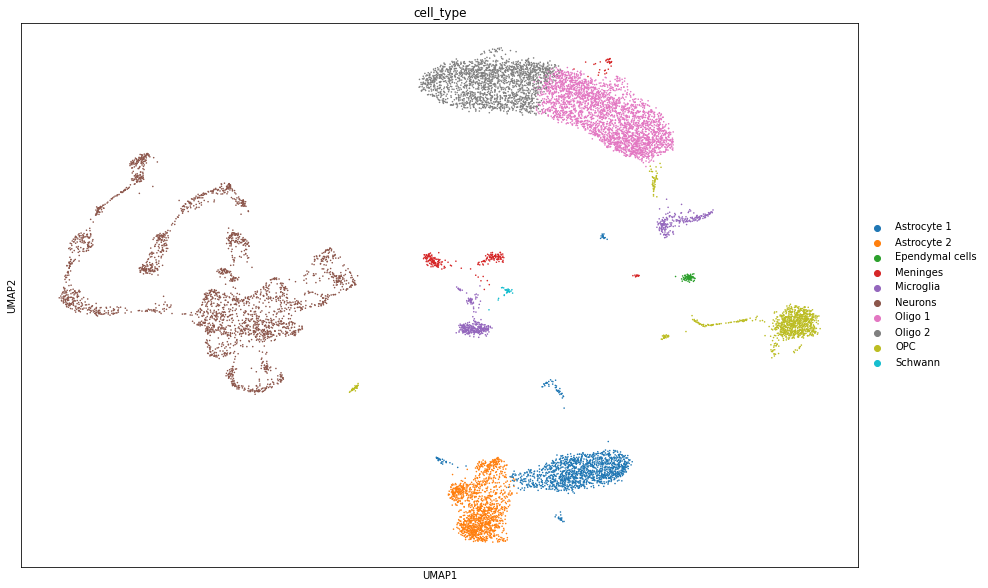

In [510]:
sc.pl.umap(full_ann,color="cell_type",save="_fig1_umap.pdf")

In [504]:
full_markers = ["ITGB4","GFAP","SLC7A10","TRPM3","PDZRN4","MFGE8","RFX2","DNAH12","LAMA2","BICC1",
               "MYO1F","PALD1","AIF1","SRRM3","MYT1L","RBFOX3","QDPR","DPY19L1","S100B","MEGF11","UST","TNR",
                "MPZ","PMP22"]

In [505]:
full_ann.var_names_make_unique()


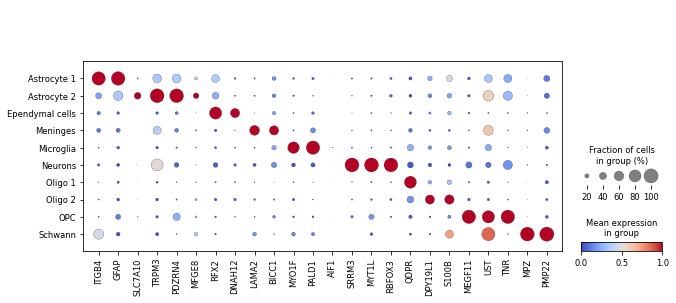

In [511]:
sc.pl.dotplot(full_ann,var_names=full_markers,groupby="cell_type",cmap="coolwarm",standard_scale="var",save="_fig1_dotplot.pdf")

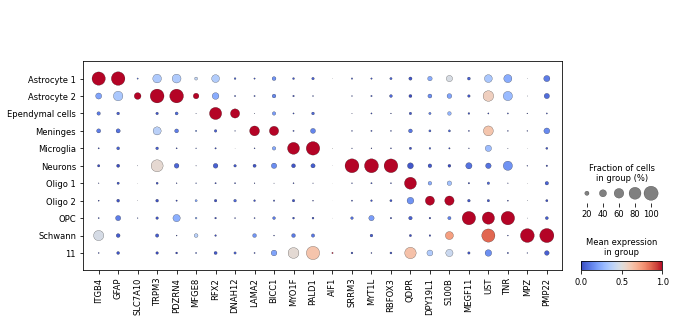

In [494]:
sc.pl.dotplot(full_ann,var_names=full_markers,groupby="cell_type",cmap="coolwarm",standard_scale="var")

In [407]:
sc.tl.rank_genes_groups(full_ann,groupby="cell_type",groups=["Oligo 1"],reference="Oligo 2")

In [408]:
full_ann.uns["rank_genes_groups"]["names"][:10]

rec.array([('QDPR',), ('ERBB4',), ('SGK1',), ('CLMN',), ('PHLPP1',),
           ('KIRREL3',), ('COBL',), ('TMTC1',), ('GRM3',), ('SLC24A2',)],
          dtype=[('Oligo 1', 'O')])

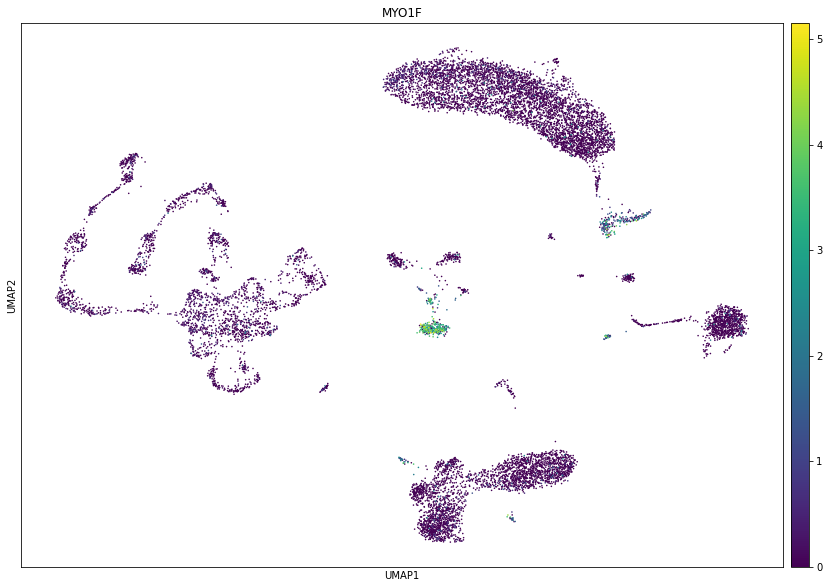

In [428]:
sc.pl.umap(full_ann,color="MYO1F")

In [512]:
full_ann.write("../paper_inter_data/all_cells_integrated_clustered_ann.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key '__categories/outliers' of <class 'h5py._hl.group.Group'> from /.

Above error raised while writing key 'outliers' of <class 'h5py._hl.group.Group'> from /.

Above error raised while writing key 'obs' of <class 'h5py._hl.files.File'> from /.

In [422]:
del full_ann.obs["mystery_17"]

In [424]:
full_ann.X.shape

(12243, 54894)

In [425]:
dorsal_neuron_ann.X.shape

(1954, 54894)

In [426]:
neuron_ann.X.shape

(2698, 54894)

In [456]:
full_ann.obs

Barcode  Unnamed..0  \
1      AAACCCAAGGATACGC           1   
2      AAACCCAAGTAGGTTA           2   
3      AAACCCAGTCGTATTG           3   
4      AAACGAAAGGTGATAT           4   
5      AAACGAAGTACCAATC           5   
...                 ...         ...   
12239  TTTGGTTGTATCGGTT        4353   
12240  TTTGGTTGTCTTGCGG        4354   
12241  TTTGGTTTCTGGCCAG        4355   
12242  TTTGTTGGTTAAGTCC        4356   
12243  TTTGTTGTCTCGTGAA        4357   

                                                  Sample     cxds_score  \
1      /projects/pfenninggroup/machineLearningForComp...  151402.545658   
2      /projects/pfenninggroup/machineLearningForComp...  207183.175964   
3      /projects/pfenninggroup/machineLearningForComp...  166627.210933   
4      /projects/pfenninggroup/machineLearningForComp...  126728.563342   
5      /projects/pfenninggroup/machineLearningForComp...  345115.402180   
...                                                  ...            ...   
12239  /projects/pfenninggroup/machineLearningForComp...  182315.399653   
12240  /projects/pfenninggroup/machineLearningForComp...  240653.186279   
12241  /projects/pfenninggroup/machineLearningForComp...  281311.099330   
12242  /projects/pfenninggroup/machineLearningForComp...  220228.645533   
12243  /projects/pfenninggroup/machineLearningForComp...   99646.591206   

       bcds_score  hybrid_score  precluster   nUMI  nGene sample_short  \
1        0.102375      0.258838           8  16448   5536           P0   
2        0.077937      0.303326           2  25551   7119           P0   
3        0.041322      0.211647           4   6860   3124           P0   
4        0.045736      0.165572          11  19303   6062           P0   
5        0.333406      0.757984           9  21247   6543           P0   
...           ...           ...         ...    ...    ...          ...   
12239    0.009711      0.073299           6   2010   1193           P3   
12240    0.006831      0.099185           0   1728   1089           P3   
12241    0.018482      0.131065           2   1835   1132           P3   
12242    0.015005      0.097383           6   1987   1281           P3   
12243    0.015403      0.038251           6   1434    976           P3   

                 unique_id precluster_sample  size_factor leiden    cell_type  
1      AAACCCAAGGATACGC_P0              8_P0     3.717381      6      Neurons  
2      AAACCCAAGTAGGTTA_P0              2_P0     5.914232      4      Neurons  
3      AAACCCAGTCGTATTG_P0              4_P0     1.446860      3  Astrocyte 1  
4      AAACGAAAGGTGATAT_P0             11_P0     4.297744     12      Neurons  
5      AAACGAAGTACCAATC_P0              9_P0     5.002229      6      Neurons  
...                    ...               ...          ...    ...          ...  
12239  TTTGGTTGTATCGGTT_P3              6_P3     0.451263      8     Meninges  
12240  TTTGGTTGTCTTGCGG_P3              0_P3     0.283399      1      Oligo 2  
12241  TTTGGTTTCTGGCCAG_P3              2_P3     0.327014      2  Astrocyte 2  
12242  TTTGTTGGTTAAGTCC_P3              6_P3     0.508189      8     Meninges  
12243  TTTGTTGTCTCGTGAA_P3              6_P3     0.354458      7    Microglia  

[12243 rows x 15 columns]

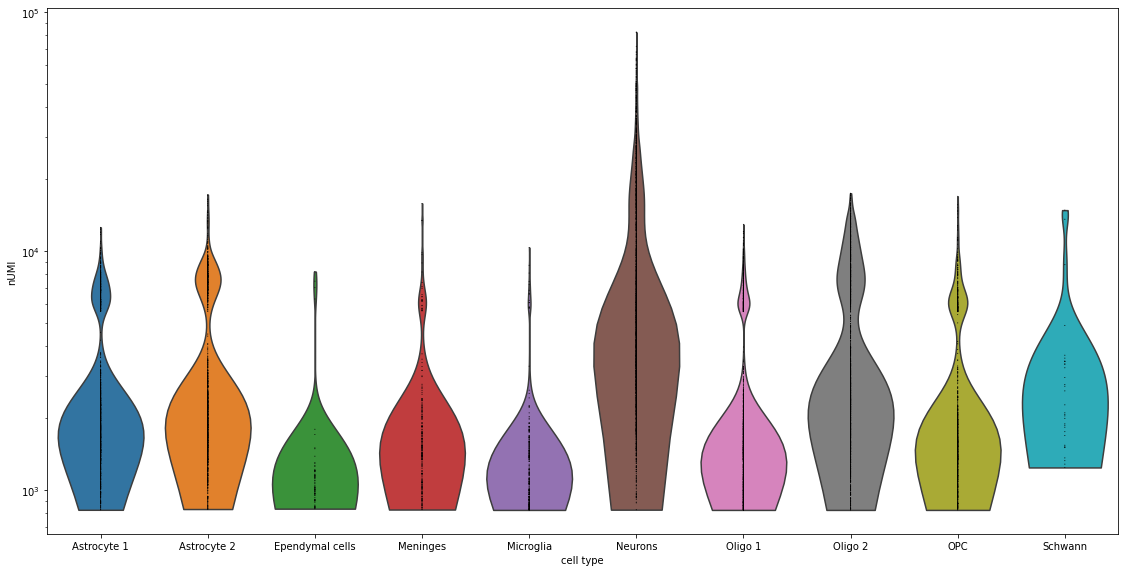

In [468]:
sc.pl.violin(full_ann,keys="nUMI",groupby="cell_type",stripplot=True,jitter=False,log=True)

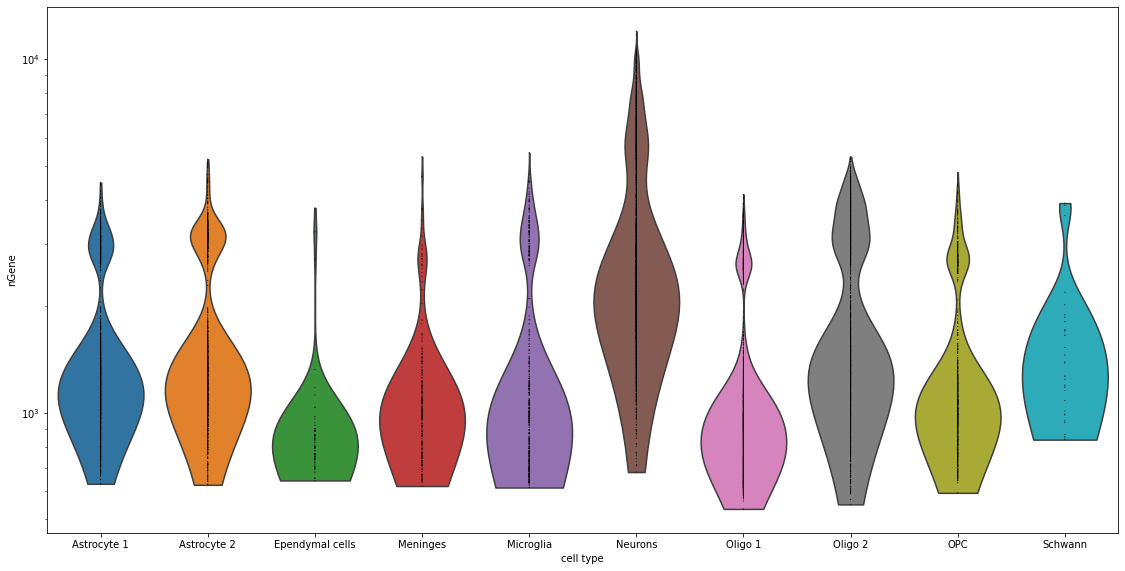

In [508]:
sc.pl.violin(full_ann,keys="nGene",groupby="cell_type",stripplot=True,jitter=False,log=True,save="_cell_type_ncount_log.pdf")

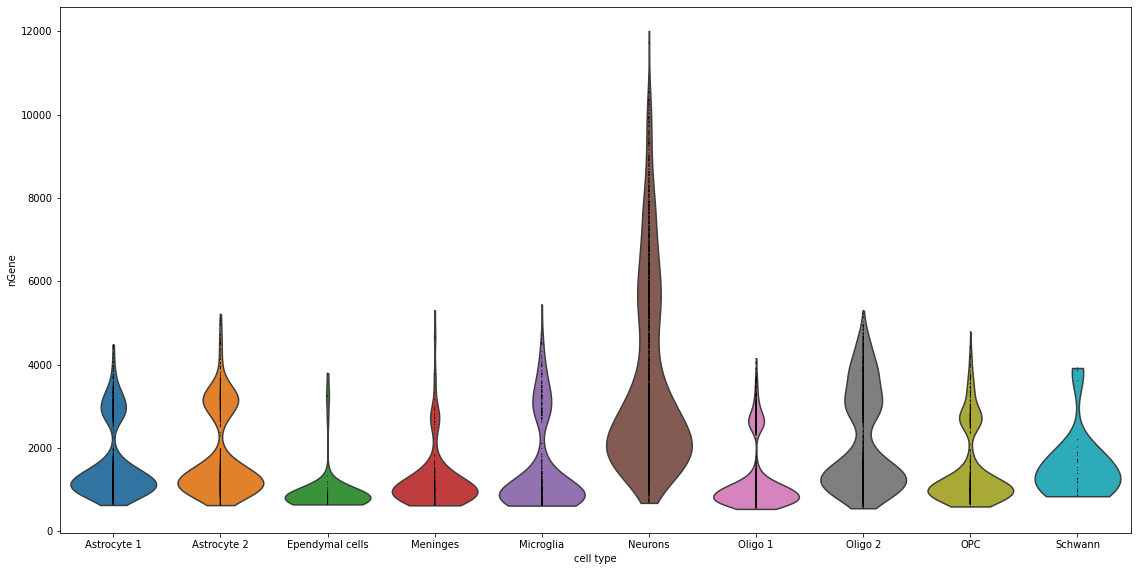

In [509]:
sc.pl.violin(full_ann,keys="nGene",groupby="cell_type",stripplot=True,jitter=False,save="_cell_type_ncount.pdf")

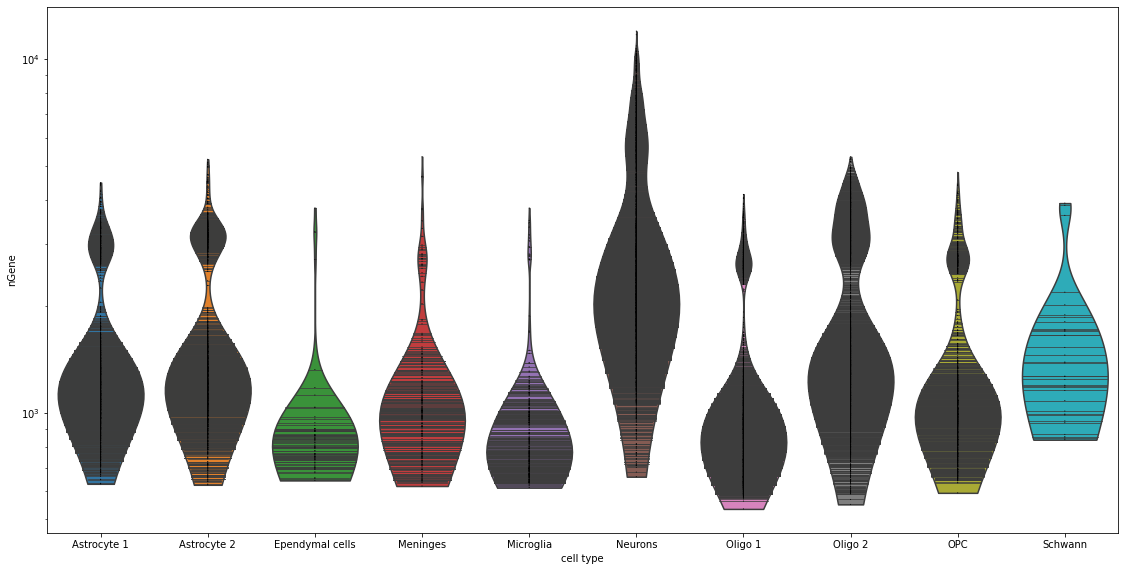

In [466]:
sc.pl.violin(full_ann,keys="nGene",groupby="cell_type",stripplot=True,jitter=False,log=True,inner="stick")

In [473]:
np.sum(full_ann.obs["leiden"]=='20')

46

In [482]:
full_neuron_index = np.concatenate([np.concatenate([P0_neuron_index,P2_neuron_index]),P3_neuron_index],axis=0)

In [480]:
P0_neuron_index.shape

(3302,)

In [483]:
full_neuron_index.shape

(12243,)

In [484]:
full_ann.X.shape

(12243, 54894)

In [485]:
outliers = np.logical_xor(full_neuron_index,full_ann.obs["cell_type"]=="Neurons")

In [486]:
full_ann.obs["outliers"] = pd.Categorical(outliers)

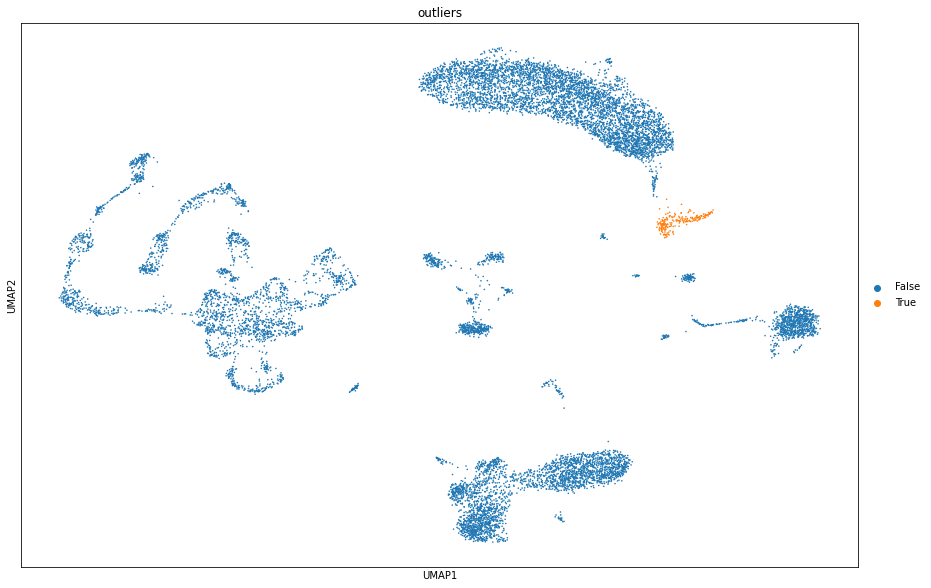

In [487]:
sc.pl.umap(full_ann,color="outliers")

In [507]:
np.sum(full_ann.obs["cell_type"].values == 'Neurons')

2698

In [513]:
del full_ann.obs["outliers"]

In [516]:
import anndata
import scanpy
print(anndata.__version__)
print(scanpy.__version__)

0.7.6
1.7.2


In [2]:
full_ann = sc.read_h5ad("../paper_inter_data/full_integrated.h5ad")

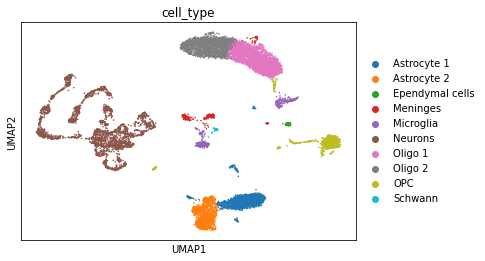

In [3]:
sc.pl.umap(full_ann,color="cell_type")

In [4]:
full_ann

AnnData object with n_obs × n_vars = 12243 × 54894
    obs: 'Barcode', 'Unnamed..0', 'Sample', 'cxds_score', 'bcds_score', 'hybrid_score', 'precluster', 'nUMI', 'nGene', 'sample_short', 'unique_id', 'precluster_sample', 'size_factor', 'leiden', 'cell_type'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'neighbors', 'outliers_colors', 'rank_genes_groups', 'sample_short_colors', 'umap'
    obsm: 'X_umap', 'scanorama'
    obsp: 'connectivities', 'distances'

In [5]:
full_ann.obs.groupby('cell_type', as_index=False)['nGene'].mean()

cell_type        nGene
0      Astrocyte 1  1649.266576
1      Astrocyte 2  1831.398426
2  Ependymal cells   945.205128
3         Meninges  1244.411321
4        Microglia  1510.868914
5          Neurons  3601.349518
6          Oligo 1  1217.928447
7          Oligo 2  2182.622908
8              OPC  1494.288153
9          Schwann  1567.000000

In [6]:
full_ann.obs.groupby('cell_type', as_index=False)['nUMI'].mean()

cell_type          nUMI
0      Astrocyte 1   3117.863295
1      Astrocyte 2   3870.354793
2  Ependymal cells   1389.384615
3         Meninges   2169.600000
4        Microglia   2903.878277
5          Neurons  10140.791327
6          Oligo 1   2340.593368
7          Oligo 2   5154.976987
8              OPC   2921.531124
9          Schwann   3283.264706